# Phenotype data visualization on R
2026.02.17 created by @carushi
Used in Fig 1.

## Metadata of bulk and scRNA-seq
* Available phenotypic data: chemical blood test results and weight
* Original data is provided by Ballouz S, et al. Nat Comm, 2023.

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(lubridate)
library(viridis)
library(openxlsx)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union



 次のパッケージを付け加えます: ‘lubridate’ 


 以下のオブジェクトは ‘package:base’ からマスクされています:

    date, intersect, setdiff, union


 要求されたパッケージ viridisLite をロード中です 



In [2]:
load("../bulk_transcriptome/data/metadata.Rdata")
print(objects())

[1] "meta"  "pData"


In [3]:
print(head(meta))
print(head(pData))

   LibID   SID       ID  altID Ind Quad Lanes Sex Batches Infected Timepoint
1 298818 97930 15-501_1 15-501   1    1     1   M       1        0         1
2 298819 97931 15-502_1 15-502   2    1     1   M       1        0         1
3 298820 97932 15-503_1 15-503   3    1     2   M       1        0         1
4 298821 97933 15-504_1 15-504   4    1     2   M       1        0         1
5 298822 97934 12-101_1 12-101   1    2     2   F       1        0         1
6 298823 97935 12-102_1 12-102   2    2     2   F       1        0         1
  FileID
1 298818
2 298819
3 298820
4 298821
5 298822
6 298823
          LibID   SID       ID  altID Ind Quad Lanes Sex Batches Infected
15-501_1 298818 97930 15-501_1 15-501   1    1     1   M       1        0
15-502_1 298819 97931 15-502_1 15-502   2    1     1   M       1        0
15-503_1 298820 97932 15-503_1 15-503   3    1     2   M       1        0
15-504_1 298821 97933 15-504_1 15-504   4    1     2   M       1        0
12-101_1 298822 97934 12-101

In [4]:
weight <- read.table("../data/phenotype_data/phenotype_data_selected.tsv", sep="\t", header=T)
print(head(weight))

      ID       Date     Time Weight  AST  LDH ALT WBC LY.. MO.. GR.. LY. MO.
1 16-201 2018-06-15 11:23:00   6.70 22.2  755  NA 6.3 43.5 39.1 17.4 2.7 2.5
2 16-201 2018-07-20 02:45:00   6.75 36.0  915 5.7 4.1   NA   NA   NA  NA  NA
3 16-202 2018-06-15 11:34:00   6.95 21.4  716  NA  NA 54.1 29.8 16.1  NA  NA
4 16-202 2018-07-20 02:47:00   6.95 44.1 1007 9.3 5.6   NA   NA   NA  NA  NA
5 16-203 2018-06-15 11:35:00   6.85 20.2  741  NA 7.2 45.6 38.4 16.0 3.3 2.8
6 16-203 2018-07-20 02:49:00   6.75 20.2  797  NA 6.2   NA   NA   NA  NA  NA
  GR.  RBC  Hgb  Hct  MCV  MCH MCHC  RDW Plt MPV ...24 GLU.H time  rowname
1 1.1 5.61 10.4 32.4 57.7 18.6 32.3 16.1 520  NA    NA    NA    3 16-2_1_3
2  NA   NA   NA 29.6   NA   NA   NA   NA  NA  NA    NA    82    3 16-2_1_3
3  NA 6.31 12.0 37.0 58.6 19.1 32.6 15.7 561  NA    NA    NA    3 16-2_2_3
4  NA   NA   NA 31.7   NA   NA   NA   NA  NA  NA    NA    61    3 16-2_2_3
5 1.2 6.34 11.9 37.1 58.5 18.8 32.1 16.0 593  NA    NA    NA    3 16-2_3_3
6  NA   NA 

## Or run below cells

In [5]:
to_times <- function(x) {
  y <- as.POSIXct(x)
  format(y, "%H:%M:%S")
}
weight <- read_excel("../data/phenotype_data/original_phenotype_data.xlsx")[1:57,]
weight <- weight[-c(1, 53),]
weight$Date <- convertToDateTime(weight$Date)
weight$Time <- to_times(weight$Time)
weight <- data.frame(weight)


New names:
• `` -> `...24`


In [6]:
time_annotation = read.table("../data/phenotype_data/weight_table.tsv", sep="\t", header=T)
time_annotation <- cbind(time_annotation, format_date = gsub('^00', '20', as.character(format(strptime(as.character(time_annotation$Date), "%m/%d/%Y"), "%Y-%m-%d"))))
weight <- cbind(weight, time=unlist(apply(weight, c(1), function(x) {
    index = which(time_annotation$ID == x['ID'] & time_annotation$format_date == x['Date'])
    if (length(index) > 0) {
        return(floor(time_annotation$time[index[1]]))
    } else return(NA)
    })))
rm(time_annotation)

In [7]:
weight <- cbind(weight, rowname=sapply(1:dim(weight)[1], function(i) {
    return(paste0(substr(weight[i, 'ID'], 1, 4), '_', substr(weight[i, 'ID'], 6, 6), '_', weight[i, 'time']))
}))
weight <- cbind(weight, ident=sapply(1:dim(weight)[1], function(i) {
    return(substr(weight[i, 'ID'], 6, 6))
}))
weight <- cbind(weight, quad = unlist(sapply(weight[,'rowname'], function(x) {
    return(substr(x, 1, 4))
})))
weight = weight[weight['quad'] != '12-2',]
weight

,ID,Date,Time,Weight,AST,LDH,ALT,WBC,LY..,MO..,⋯,MCHC,RDW,Plt,MPV,...24,GLU.H,time,rowname,ident,quad
,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,16-201,2018-06-15,11:23:00,6.7,22.2,755,NA,6.3,43.5,39.1,⋯,32.299999999999997,16.100000000000001,520,NA,NA,NA,3,16-2_1_3,1,16-2
2,16-201,2018-07-20,02:45:00,6.75,36.0,915,5.7,4.0999999999999996,NA,NA,⋯,NA,NA,NA,NA,NA,82,3,16-2_1_3,1,16-2
3,16-202,2018-06-15,11:34:00,6.95,21.4,716,NA,NA,54.1,29.8,⋯,32.6,15.7,561,NA,NA,NA,3,16-2_2_3,2,16-2
4,16-202,2018-07-20,02:47:00,6.95,44.1,1007,9.3000000000000007,5.6,NA,NA,⋯,NA,NA,NA,NA,NA,61,3,16-2_2_3,2,16-2
5,16-203,2018-06-15,11:35:00,6.85,20.2,741,NA,7.2,45.6,38.4,⋯,32.1,16,593,NA,NA,NA,3,16-2_3_3,3,16-2
6,16-203,2018-07-20,02:49:00,6.75,20.2,797,NA,6.2,NA,NA,⋯,NA,NA,NA,NA,NA,64,3,16-2_3_3,3,16-2
7,16-204,2018-06-15,11:37:00,NA,19.0,721,NA,6.4,49.5,31.3,⋯,33.1,15.5,525,NA,NA,NA,3,16-2_4_3,4,16-2
8,16-204,2018-07-20,02:51:00,7.05,19.7,940,NA,4.3,NA,NA,⋯,NA,NA,NA,NA,NA,49,3,16-2_4_3,4,16-2
9,16-301,2018-07-20,02:53:00,8.4499999999999993,36.3,613,NA,5.7,NA,NA,⋯,NA,NA,NA,NA,NA,77,3,16-3_1_3,1,16-3


In [9]:
write.table(weight, "../data/metadata/phenotype_data_selected.tsv", sep="\t", quote=F)

## Visualize data

In [12]:
col = c('purple', 'red', 'orange', 'lightgreen', 'skyblue')
for (feature in colnames(weight)[4:25]) {
    mat <- data.frame(weight[,c("Date", feature, "ID", "quad", "ident")])
    mat <- mat[!is.na(mat[,feature]),]
    if (dim(mat)[1] == 0) next
    mat[,feature] <- as.numeric(as.character(mat[,feature]))
    mat[,'ident'] <- factor(mat[,'ident'])
    print(head(mat))
    g <- ggplot(mat, aes_string(x = "Date", y = feature, group="ID", color="quad", fill="quad", shape="ident")) + geom_line() + geom_point() +
         scale_color_manual(values=col)+scale_fill_manual(values=col)+theme_classic()+theme(text = element_text(size = 18))+scale_x_datetime(date_labels="%y-%m-%d")+ylab(gsub('\\.', '', feature))
    pdf(paste0("plot_", feature, ".pdf"))
    plot(g)
    dev.off()
    plot(g)
    print(head(mat))
    result = eval(parse(text=paste0("mat %>% group_by(ID, quad) %>% filter(n() >= 2) %>% do(mod = lm(", feature, " ~ Date, data = .))")))
    result = result %>% do(data.frame(ID = .$ID, quad = .$quad, var = names(coef(.$mod)), coef = coef(.$mod)))
    result = data.frame(result)
    # print(unique(result[,'var'])[1] == '(Intercept)')
    result = result[result[,'var'] == 'Date',]
    print(result)
    g <- ggplot(result, aes_string(x="quad", y = "coef", fill="quad")) + geom_boxplot() + geom_jitter(size = 0.2) +
         scale_color_manual(values=col)+scale_fill_manual(values=col)+theme_classic()+theme(text = element_text(size = 18))
    pdf(paste0("../data/metadata/figure/plot_boxplot_slope_", feature, ".pdf"))
    plot(g)
    dev.off    
    # print(data.frame(ungroup(resu lt)))
    break
}

        Date Weight     ID quad ident
1 2018-06-15   6.70 16-201 16-2     1
2 2018-07-20   6.75 16-201 16-2     1
3 2018-06-15   6.95 16-202 16-2     2
4 2018-07-20   6.95 16-202 16-2     2
5 2018-06-15   6.85 16-203 16-2     3
6 2018-07-20   6.75 16-203 16-2     3
        Date Weight     ID quad ident
1 2018-06-15   6.70 16-201 16-2     1
2 2018-07-20   6.75 16-201 16-2     1
3 2018-06-15   6.95 16-202 16-2     2
4 2018-07-20   6.95 16-202 16-2     2
5 2018-06-15   6.85 16-203 16-2     3
6 2018-07-20   6.75 16-203 16-2     3
       ID quad  var          coef
2  12-101 12-1 Date -2.143347e-08
4  12-102 12-1 Date -1.373578e-07
6  12-103 12-1 Date -1.071674e-07
8  12-104 12-1 Date -2.090515e-08
10 15-501 15-5 Date -4.117490e-08
12 15-502 15-5 Date -1.005489e-07
14 15-503 15-5 Date -1.112892e-07
16 15-504 15-5 Date -3.040354e-08
18 16-201 16-2 Date  1.653439e-08
20 16-202 16-2 Date -2.658337e-22
22 16-203 16-2 Date -3.306878e-08
24 16-302 16-3 Date -2.362056e-08
26 16-303 16-3 Date -4.603

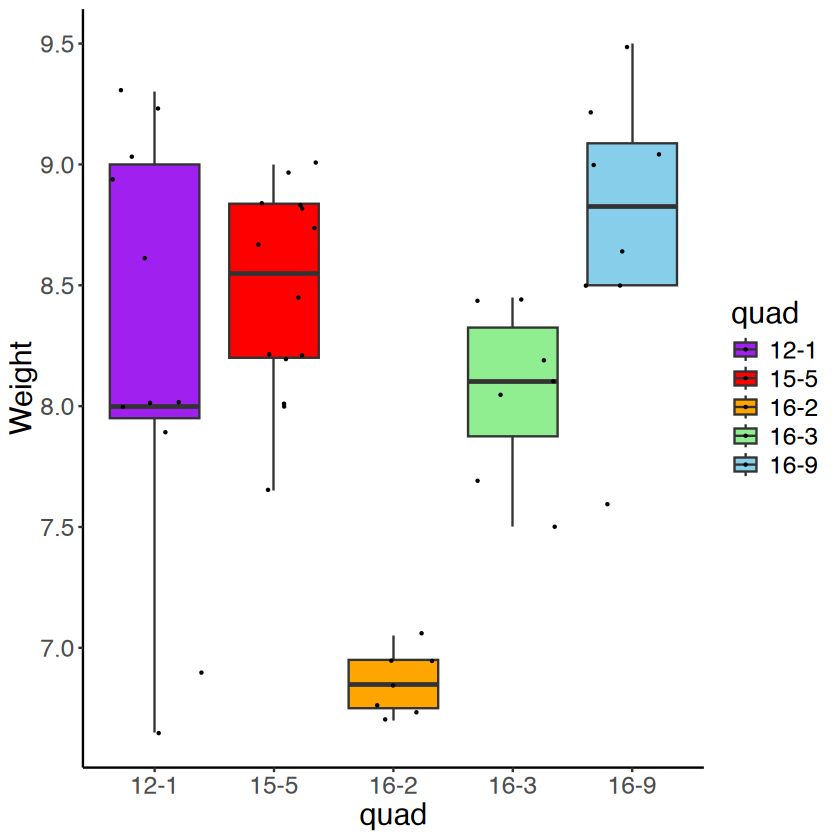

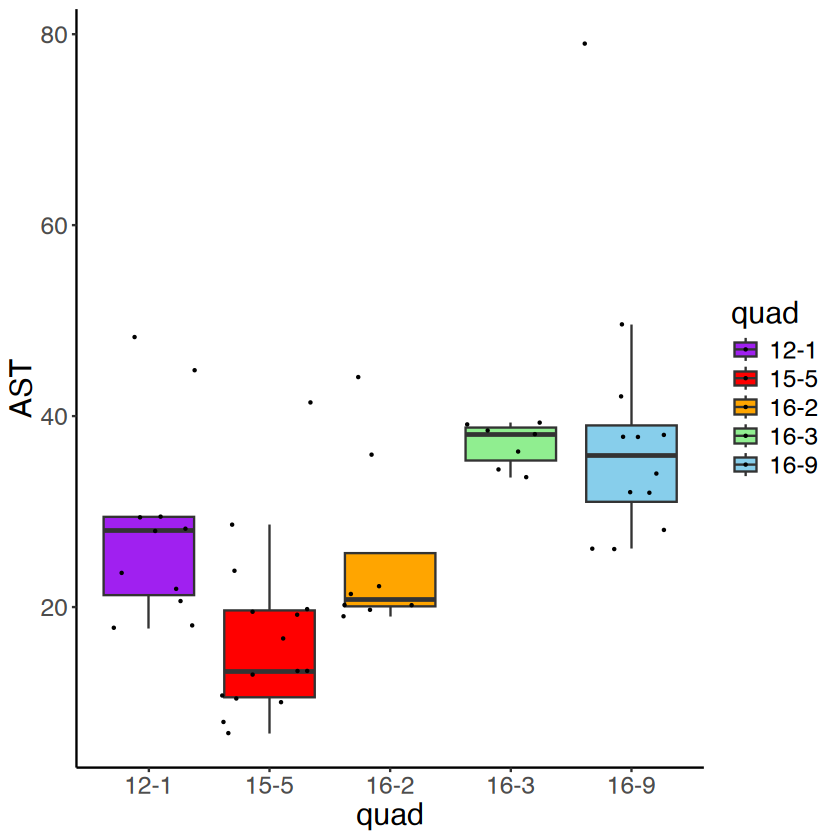

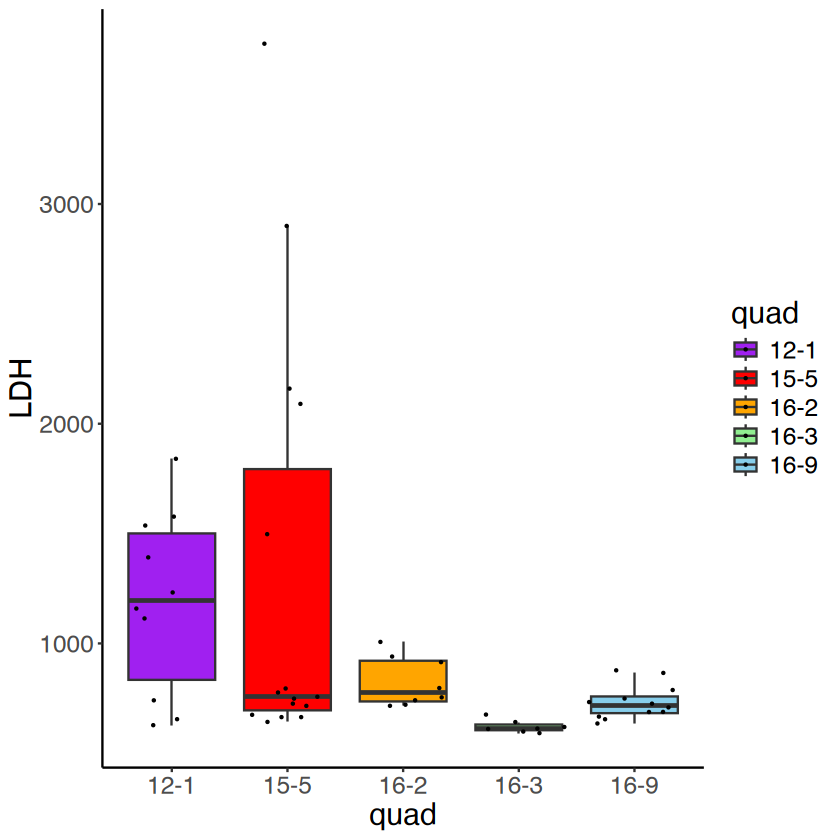

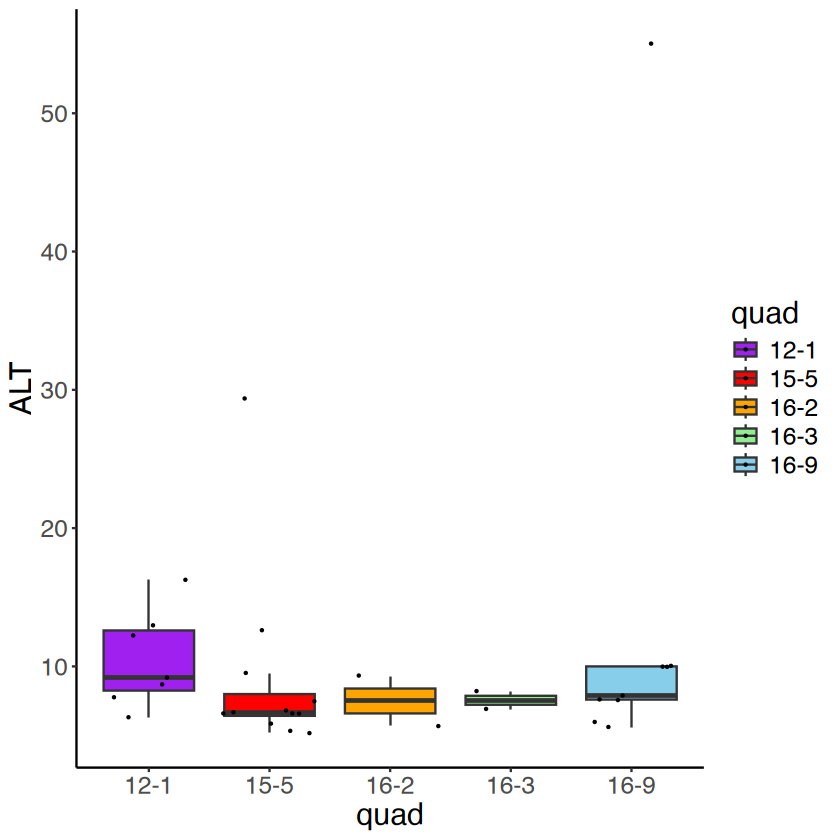

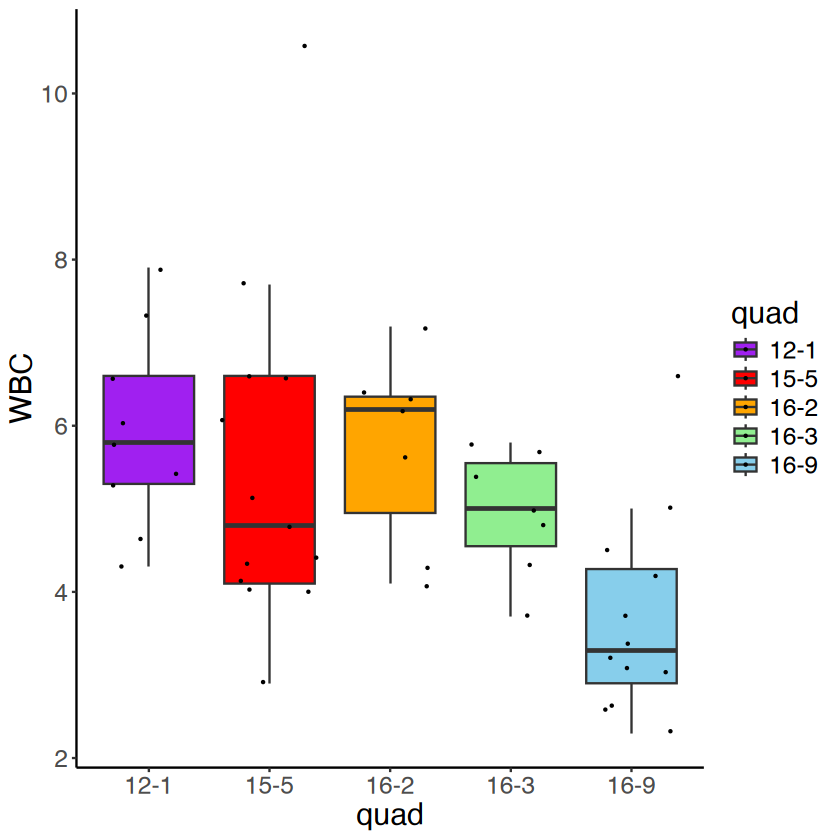

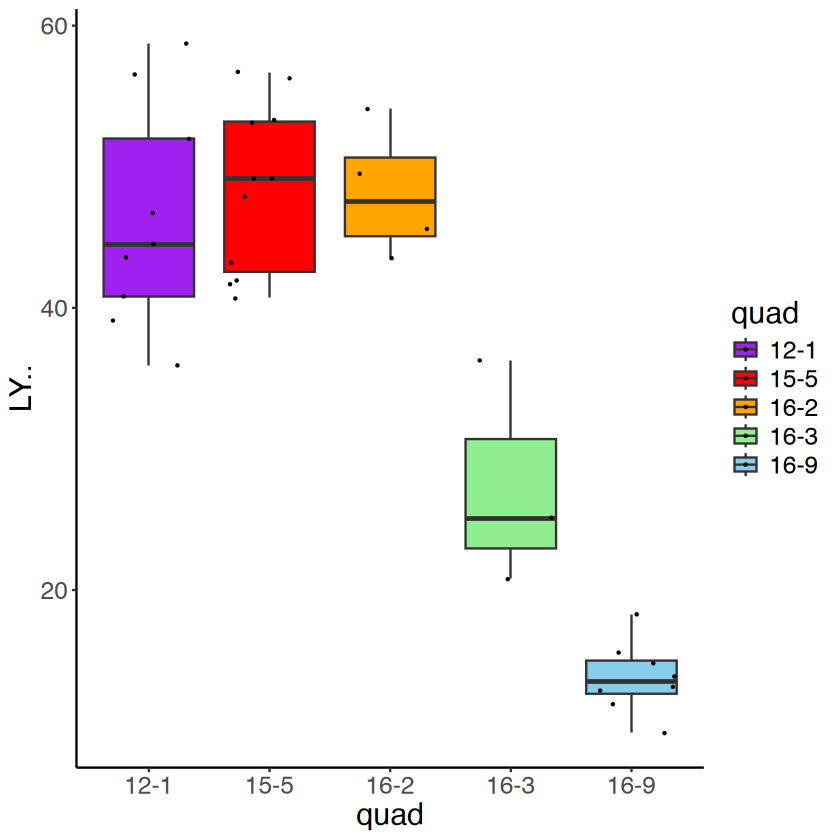

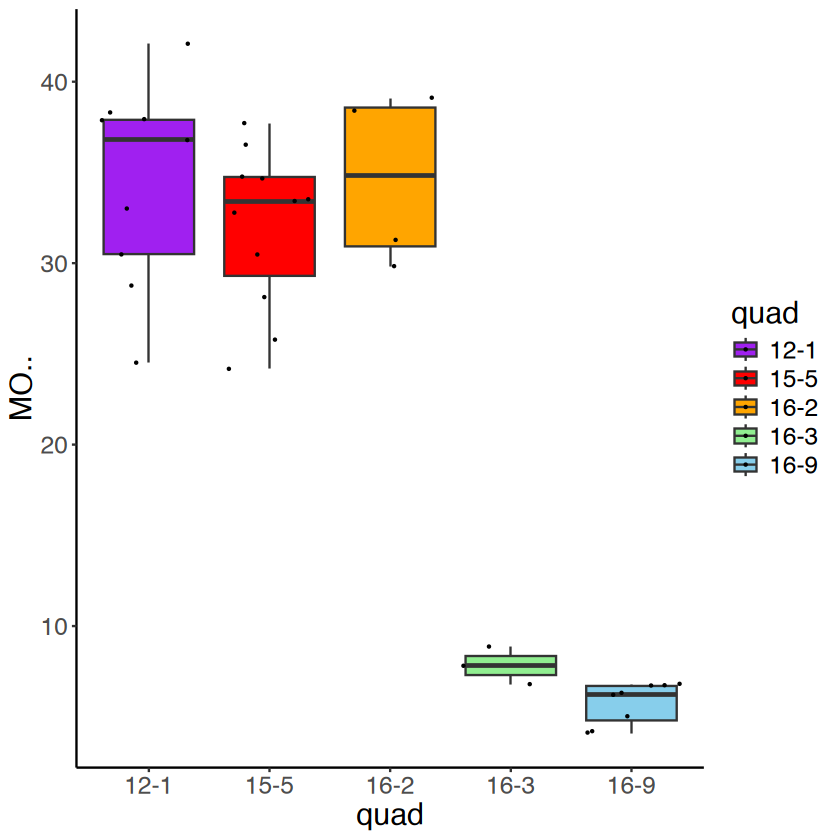

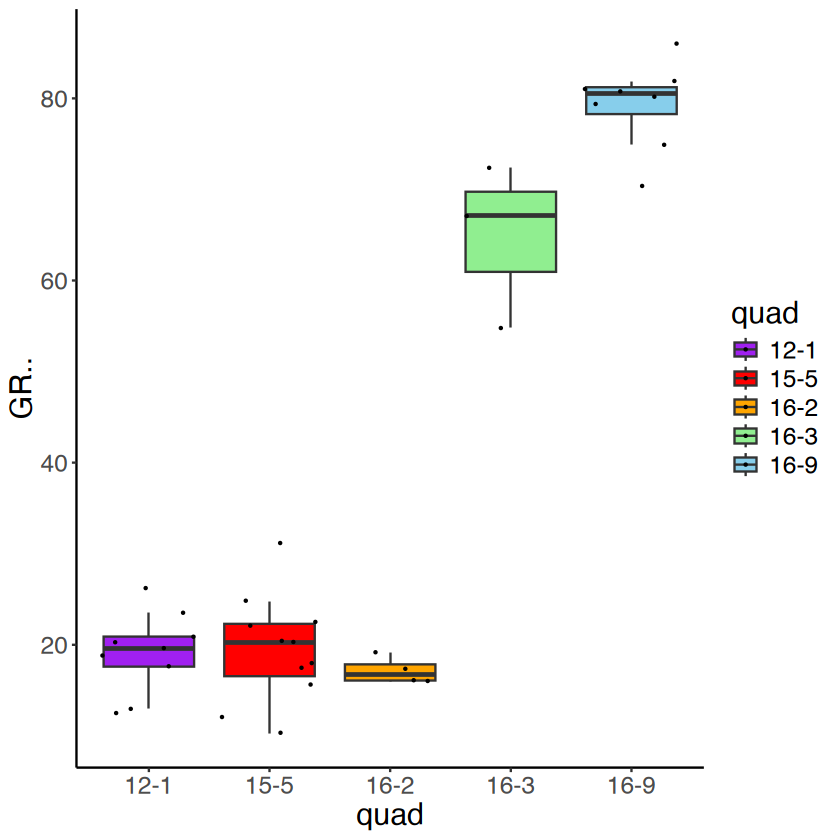

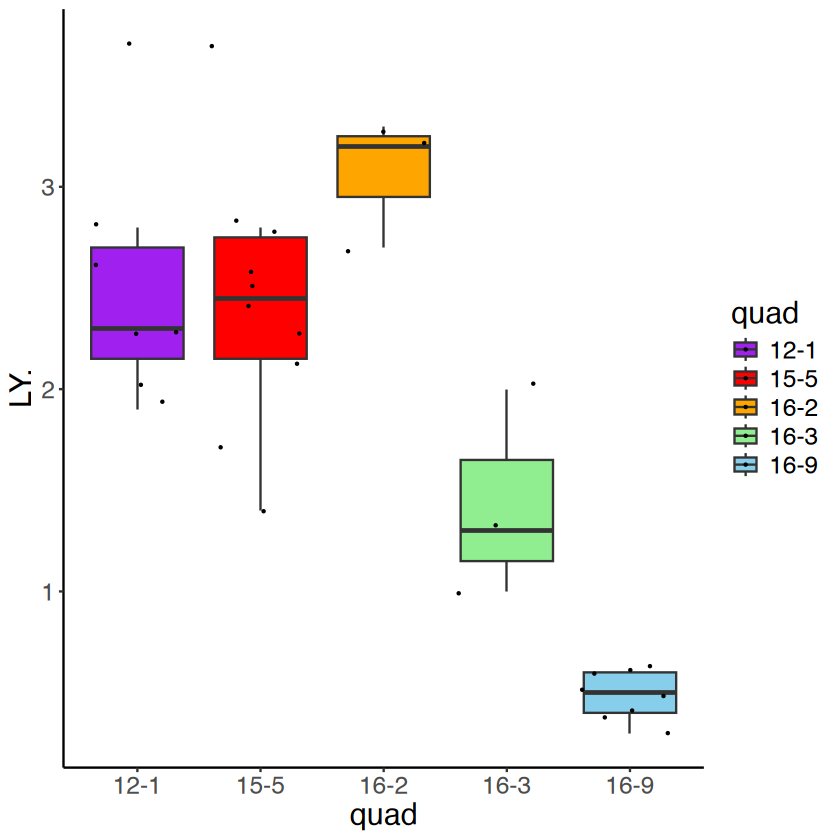

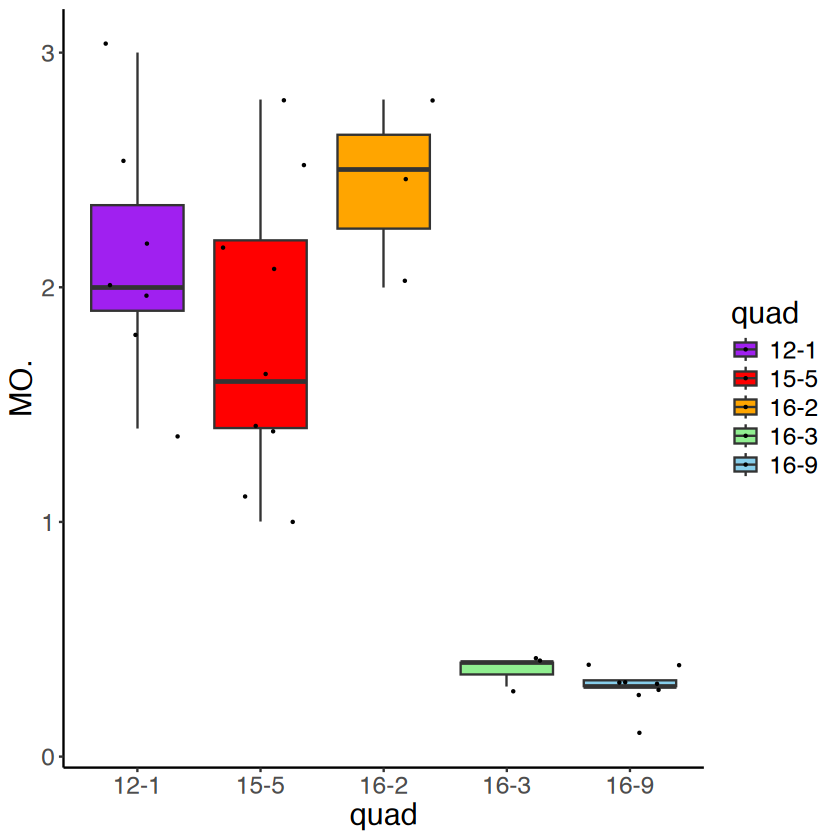

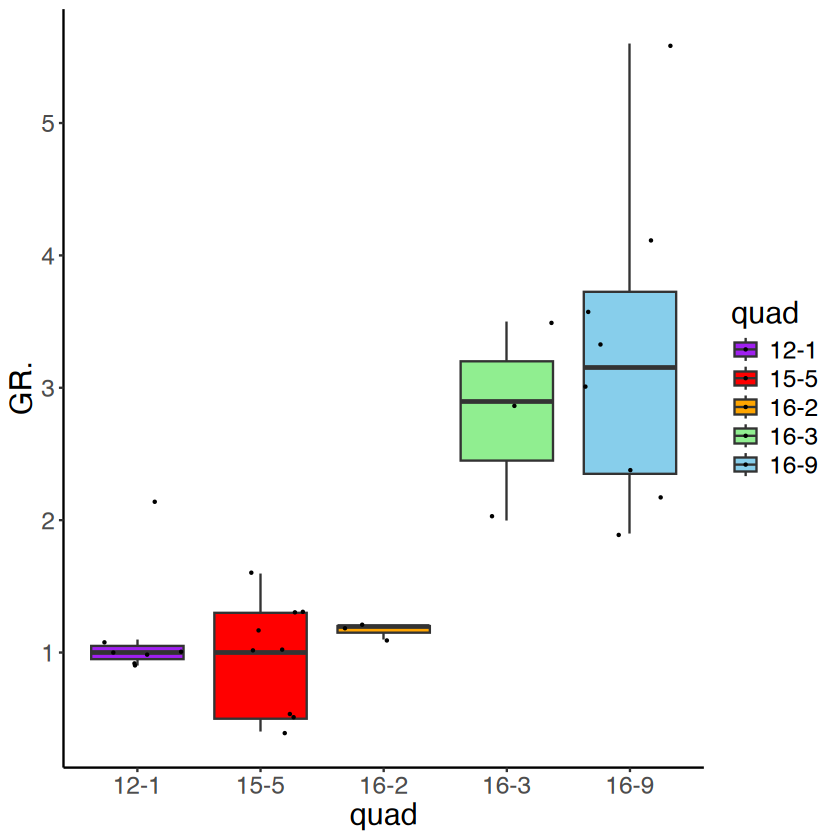

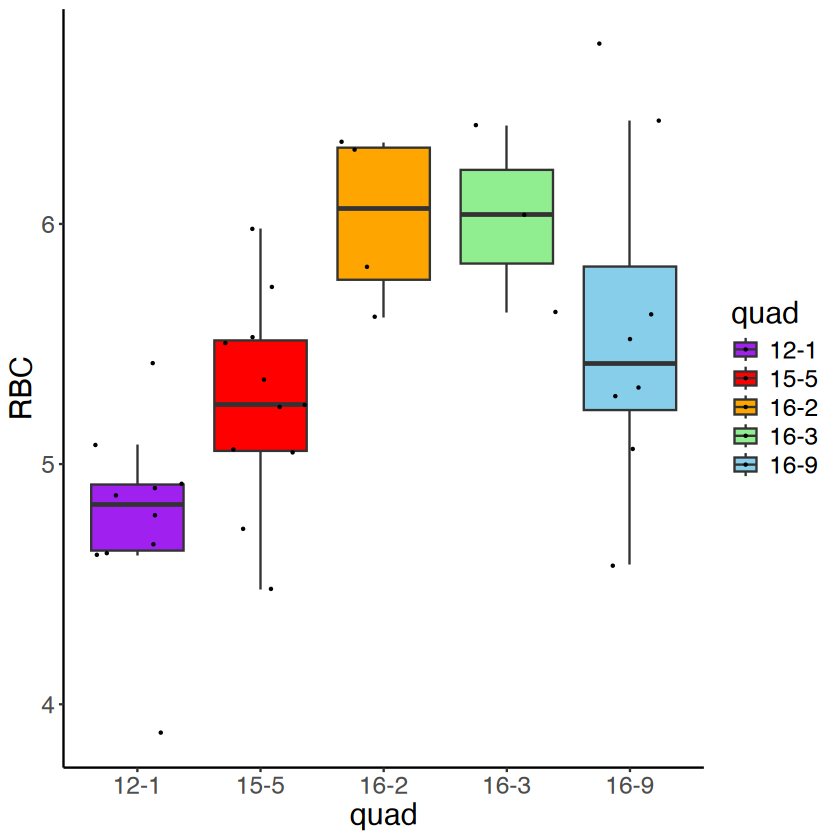

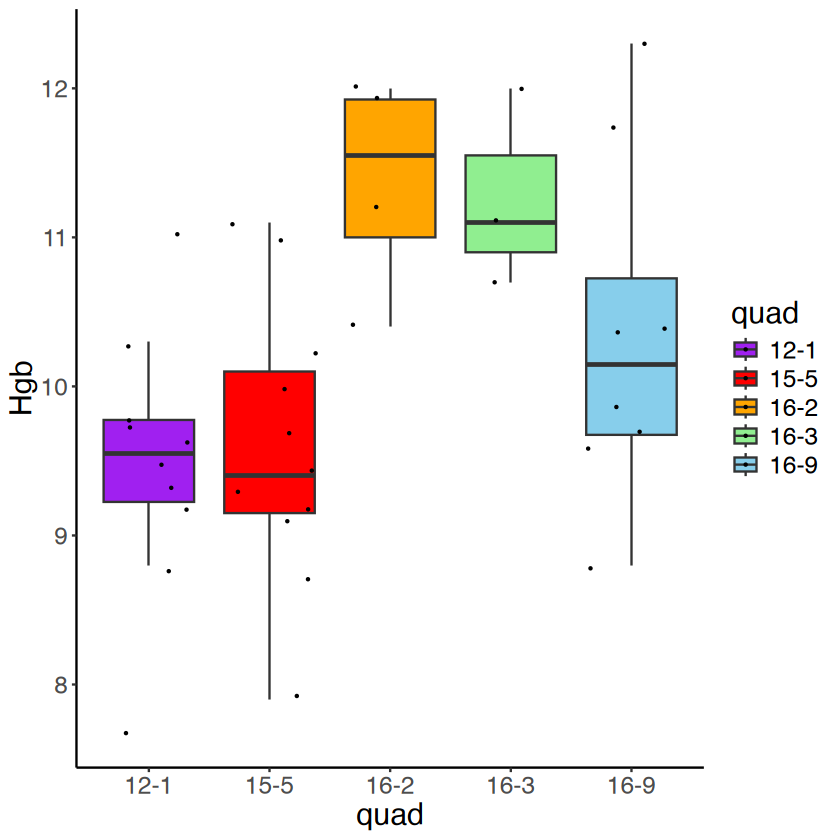

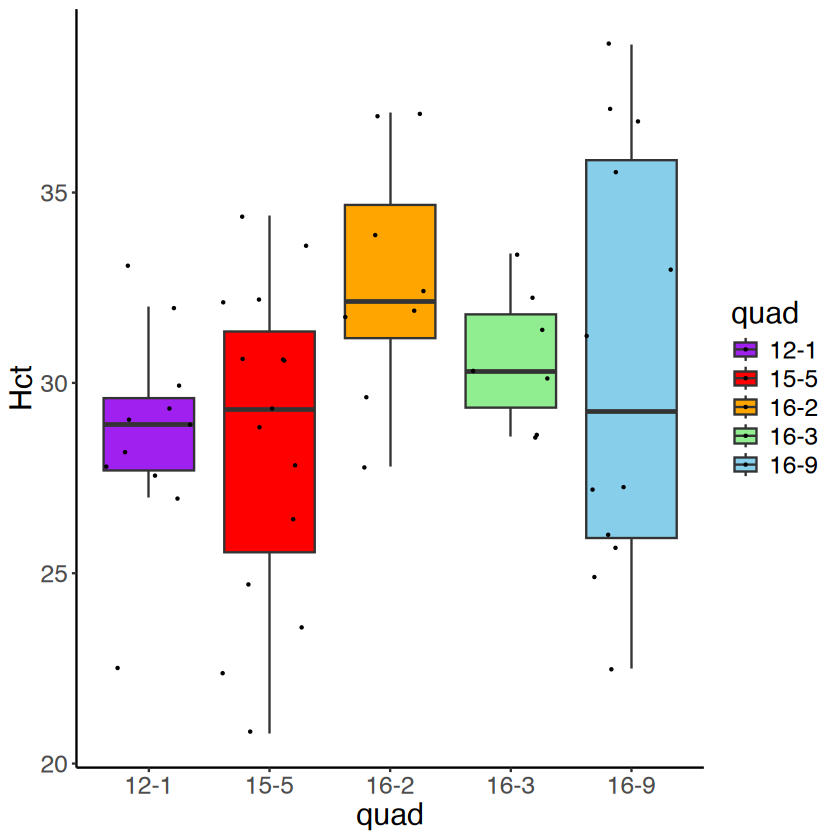

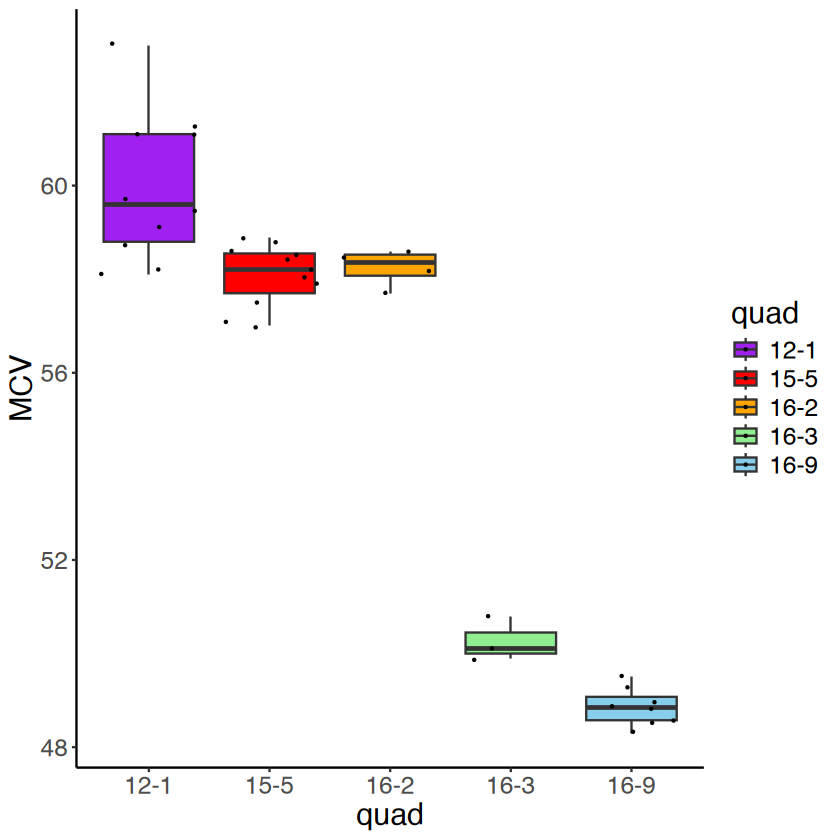

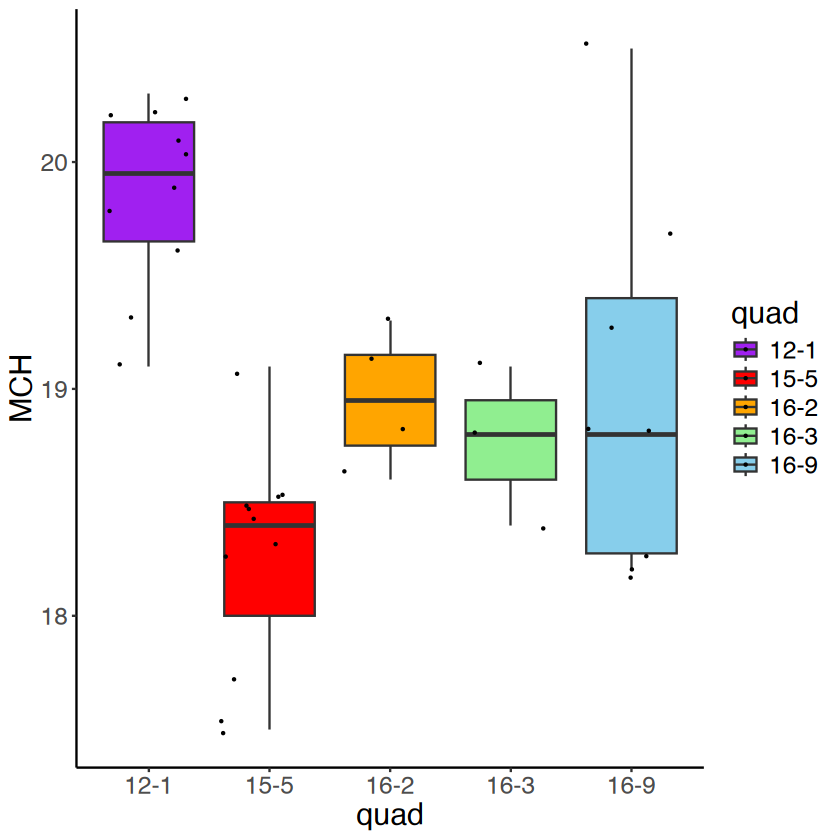

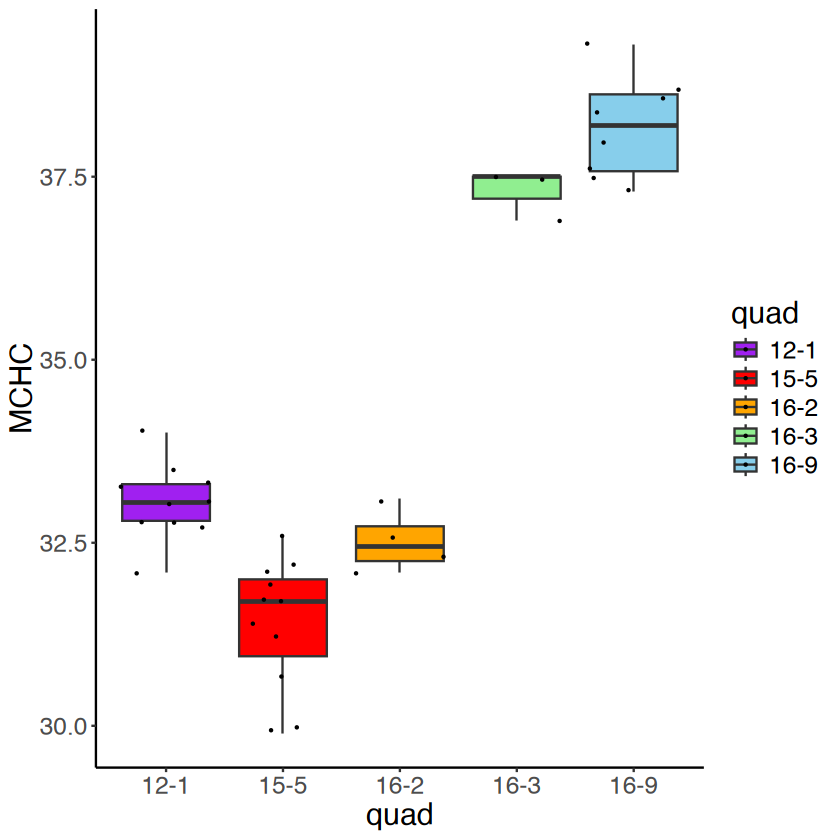

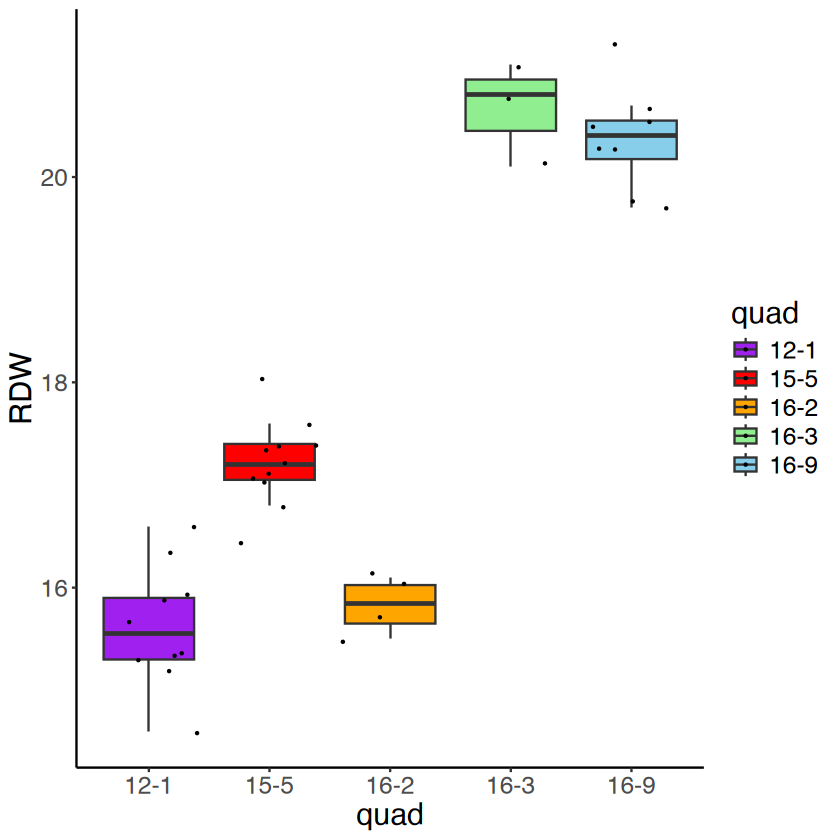

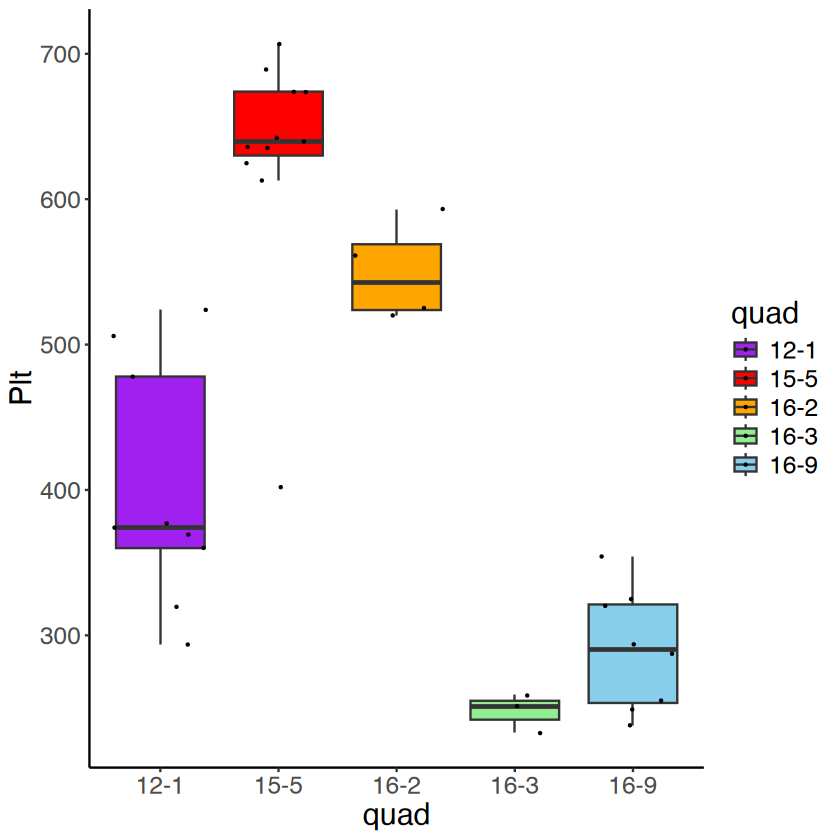

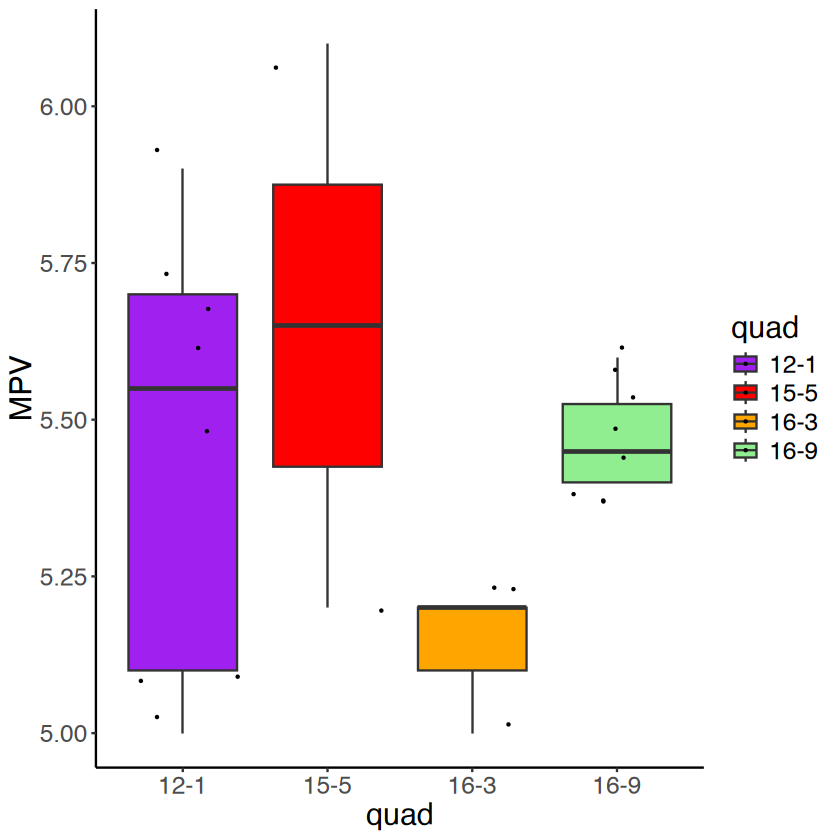

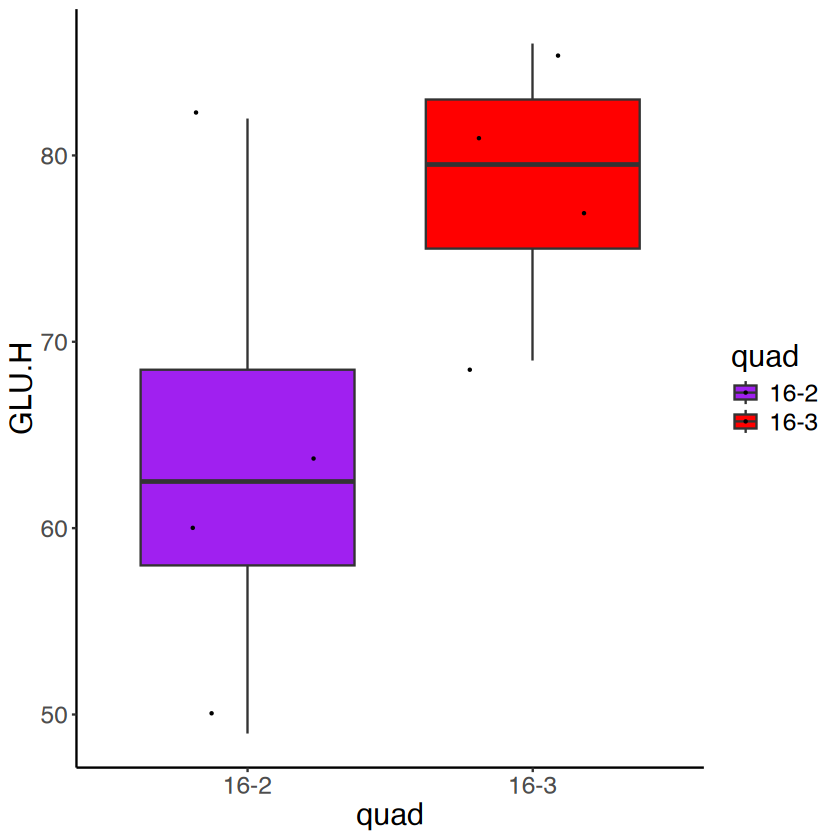

In [13]:
# Within quad distribution
col = c('purple', 'red', 'orange', 'lightgreen', 'skyblue')
for (feature in colnames(weight)[4:25]) {
    mat <- data.frame(weight[,c("Date", feature, "ID", "quad", "ident", "time")])
    mat <- mat[!is.na(mat[,feature]),]
    if (dim(mat)[1] == 0) next
    mat <- cbind(mat, group=paste0(mat[,'quad'], '_', mat[,'time']))
    mat[,feature] <- as.numeric(as.character(mat[,feature]))
    g <- ggplot(mat, aes_string(x="quad", y = feature, fill="quad")) + geom_boxplot(outlier.shape = NA) + geom_jitter(size = 0.2) +
         scale_color_manual(values=col)+scale_fill_manual(values=col)+theme_classic()+theme(text = element_text(size = 18))
    pdf(paste0("../data/metadata/figure/plot_boxplot_", feature, ".pdf"))
    plot(g)
    dev.off()
    plot(g)
}

[1] "SD result"
[1] "4"                 "Weight"            "0.893750230033095"
[4] "0.557199402763001"


Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


[1] "SD result"
[1] "5"                "AST"              "11.8034461961439" "7.88647890111203"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


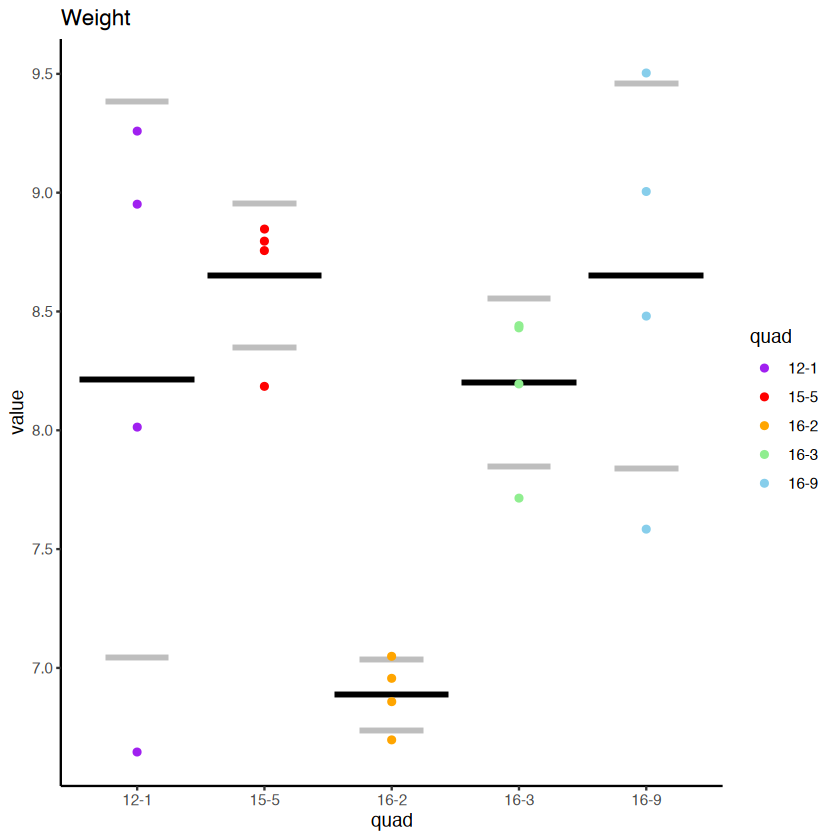

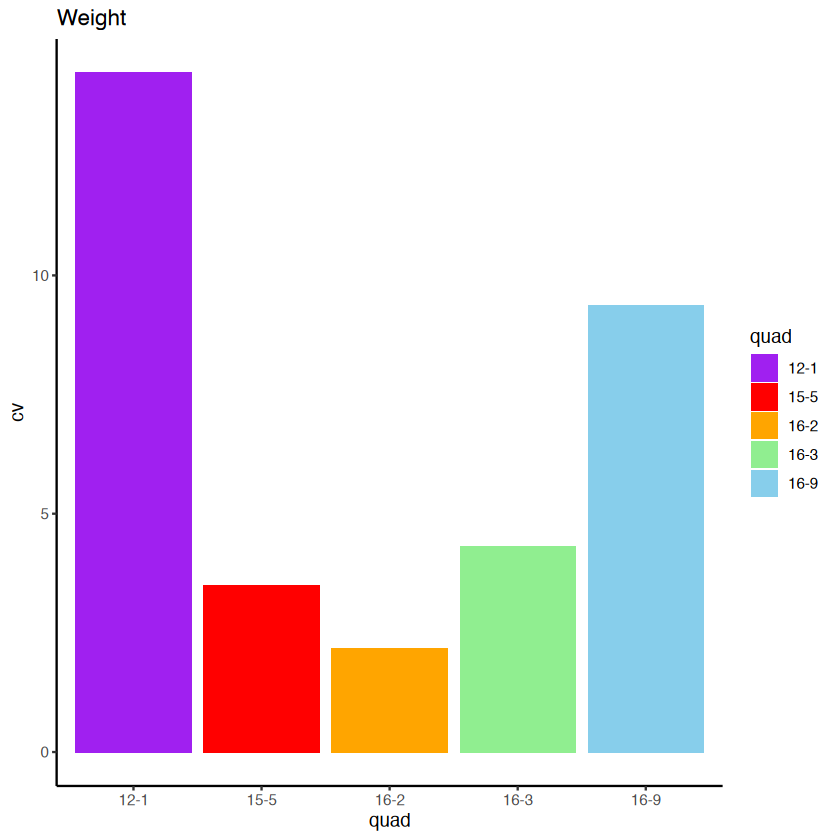

[1] "SD result"
[1] "6"                "LDH"              "244.998018251921" "118.627231672487"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


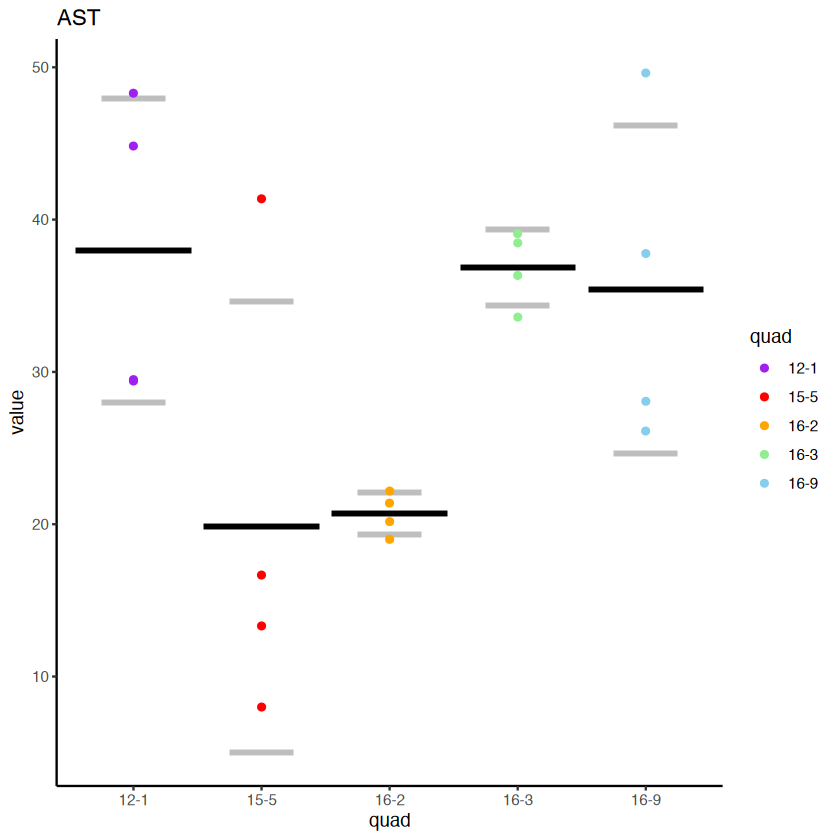

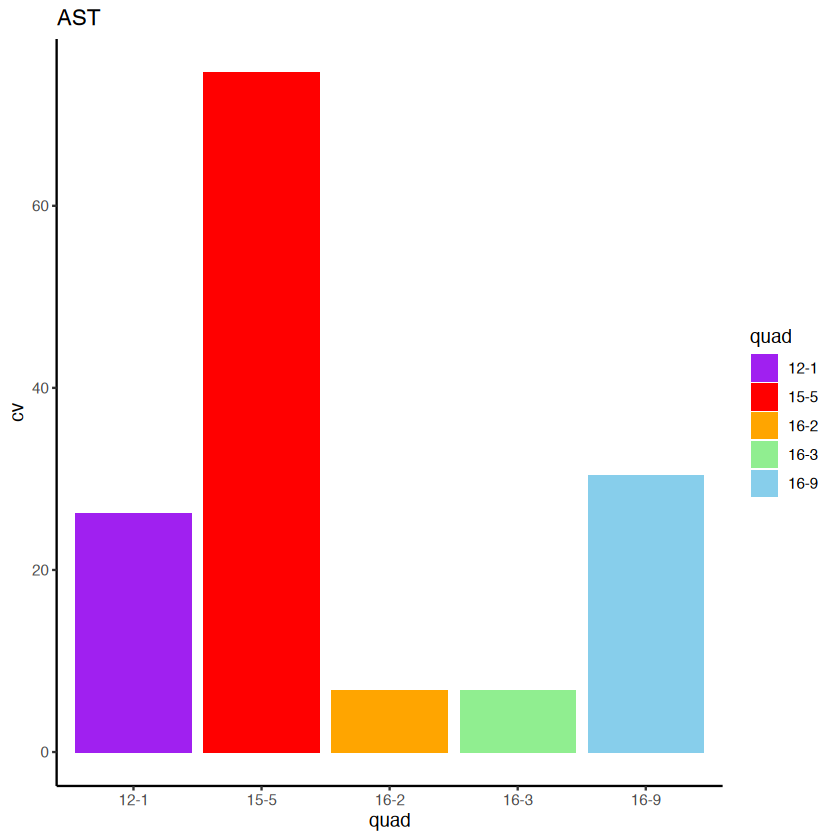

[1] "SD result"
[1] "7"                "ALT"              "14.2282902143667" "12.7264275670127"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


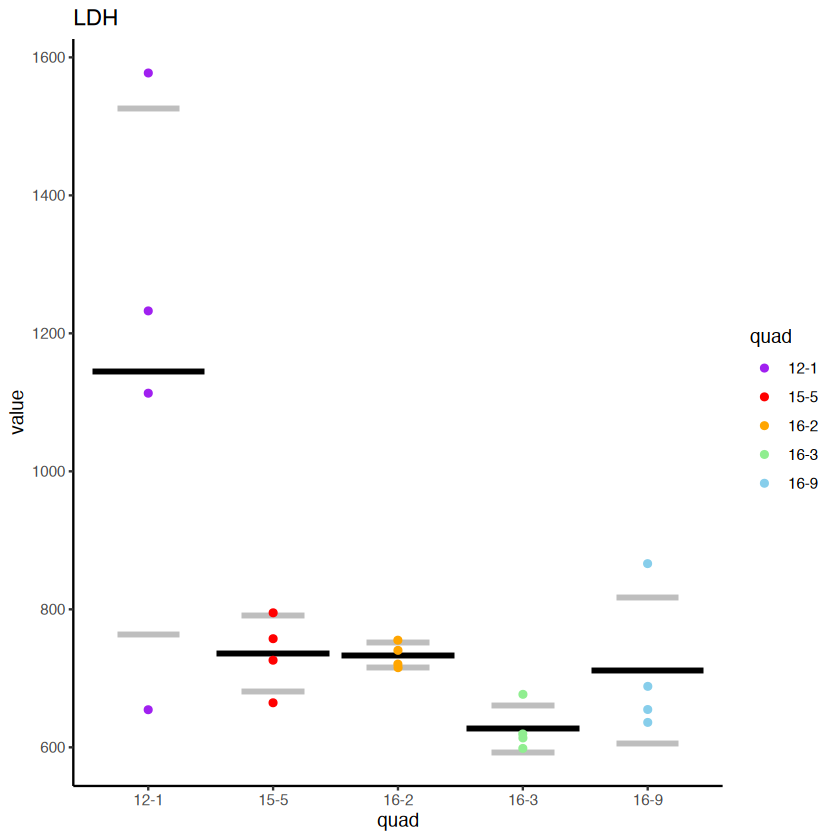

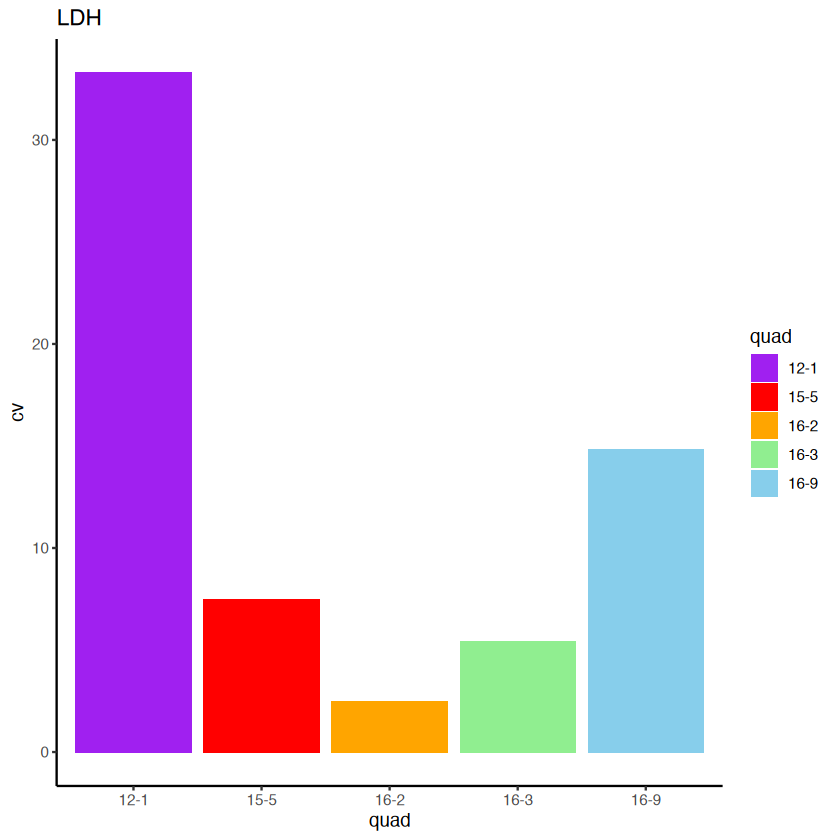

[1] "SD result"
[1] "8"                "WBC"              "1.51869057172012" "1.19206959019101"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


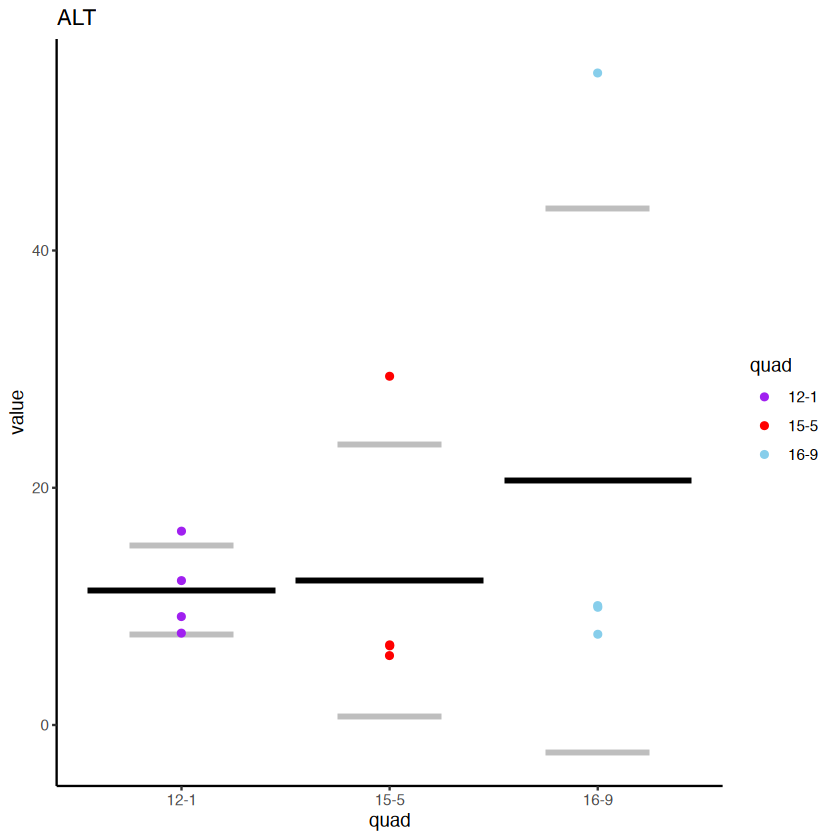

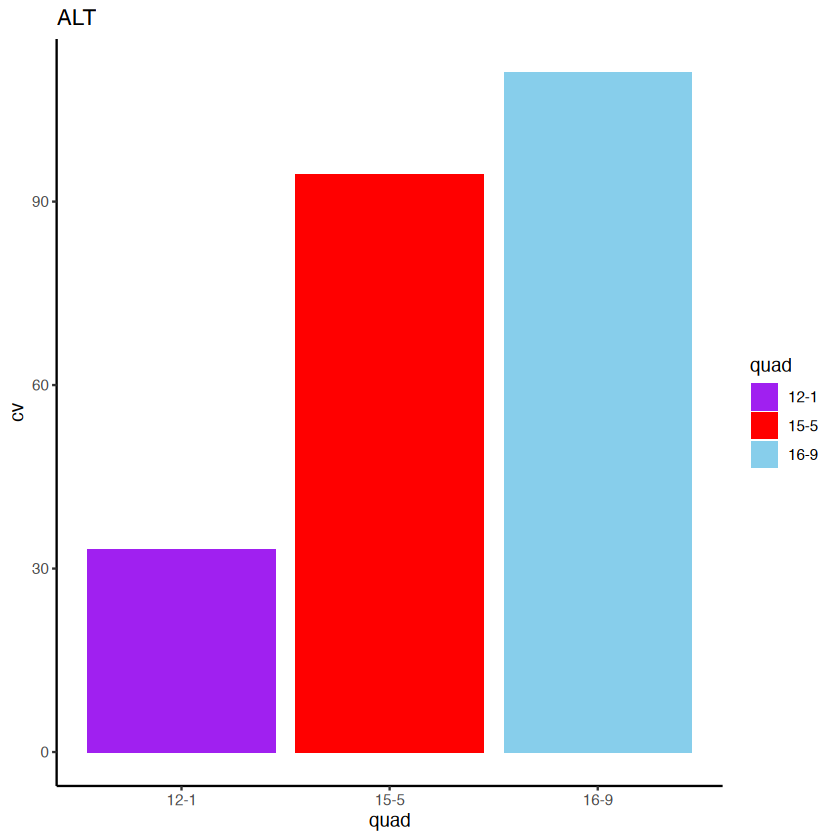

[1] "SD result"
[1] "9"                "LY.."             "15.6979525507537" "4.79982064953856"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


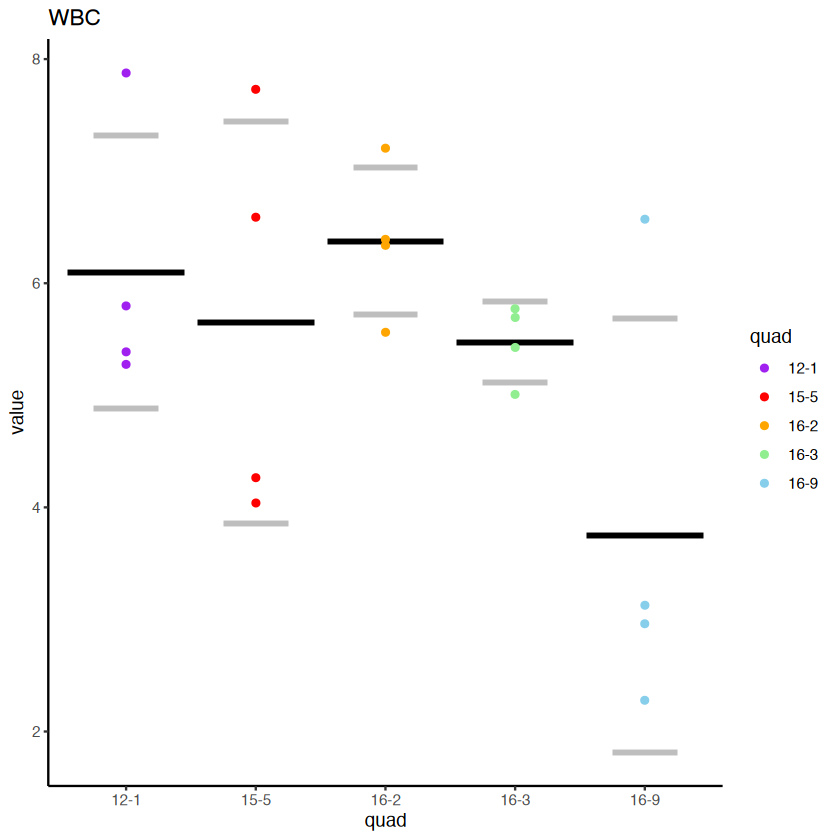

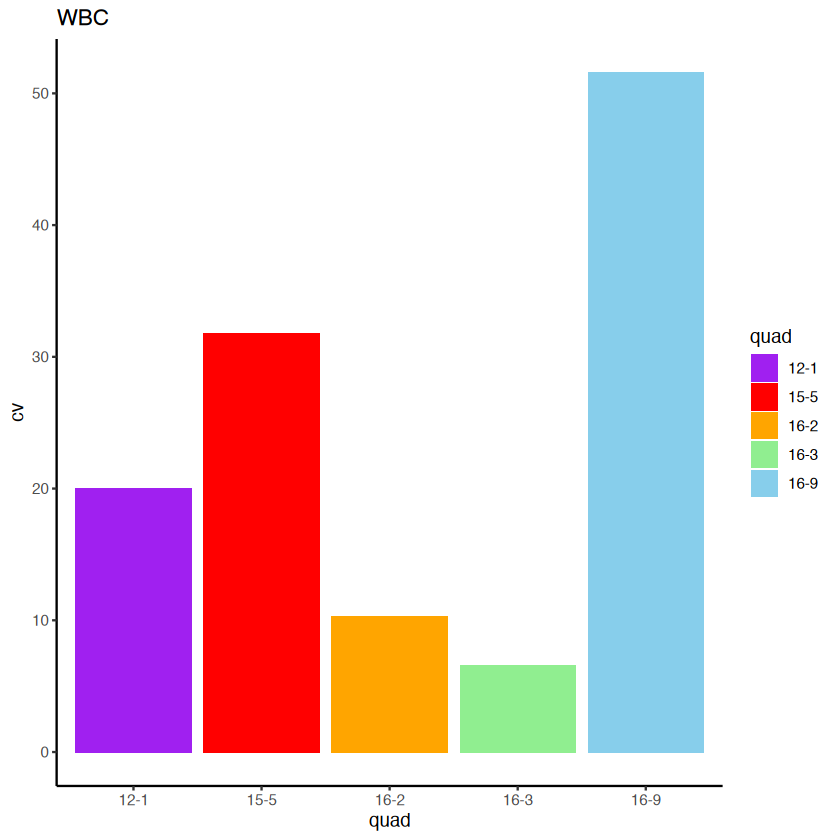

[1] "SD result"
[1] "10"               "MO.."             "14.3281541030239" "2.13897655995616"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


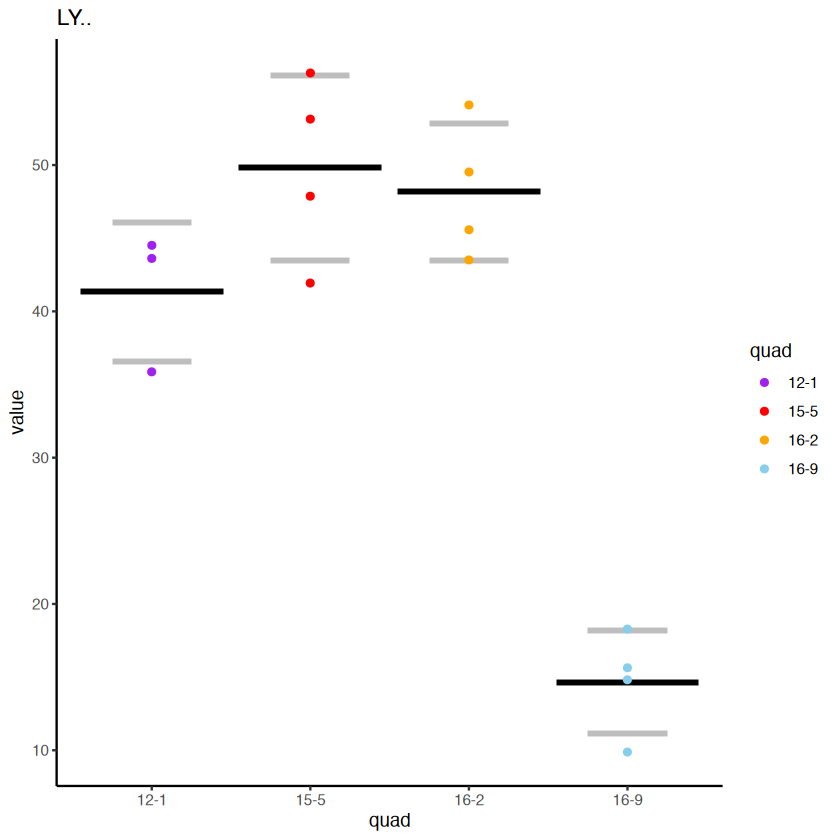

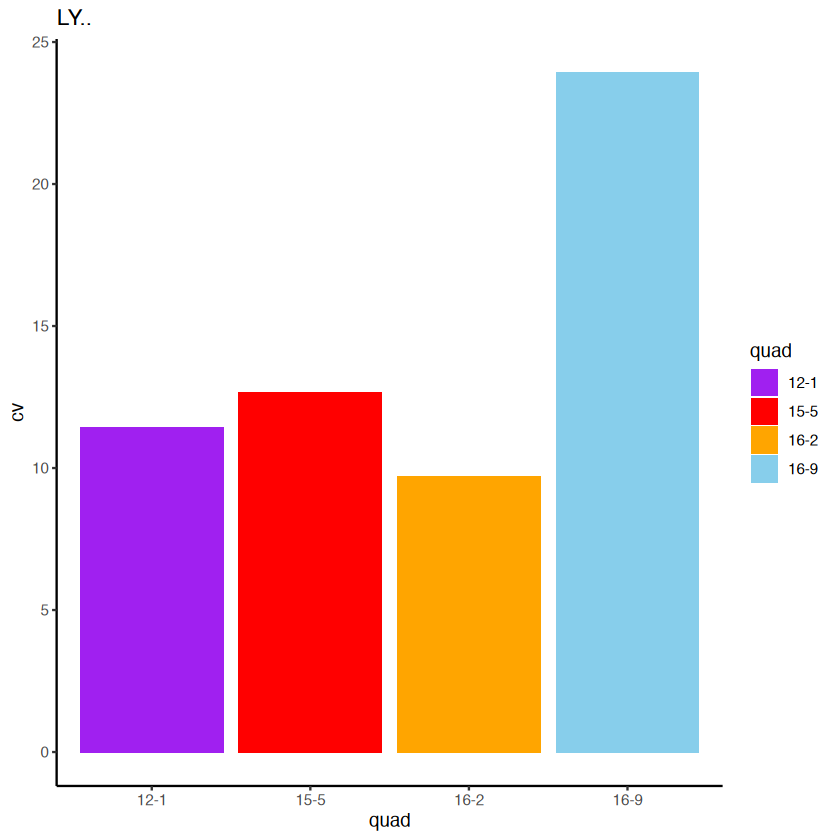

[1] "SD result"
[1] "11"               "GR.."             "29.1397421304405" "3.75576139235422"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


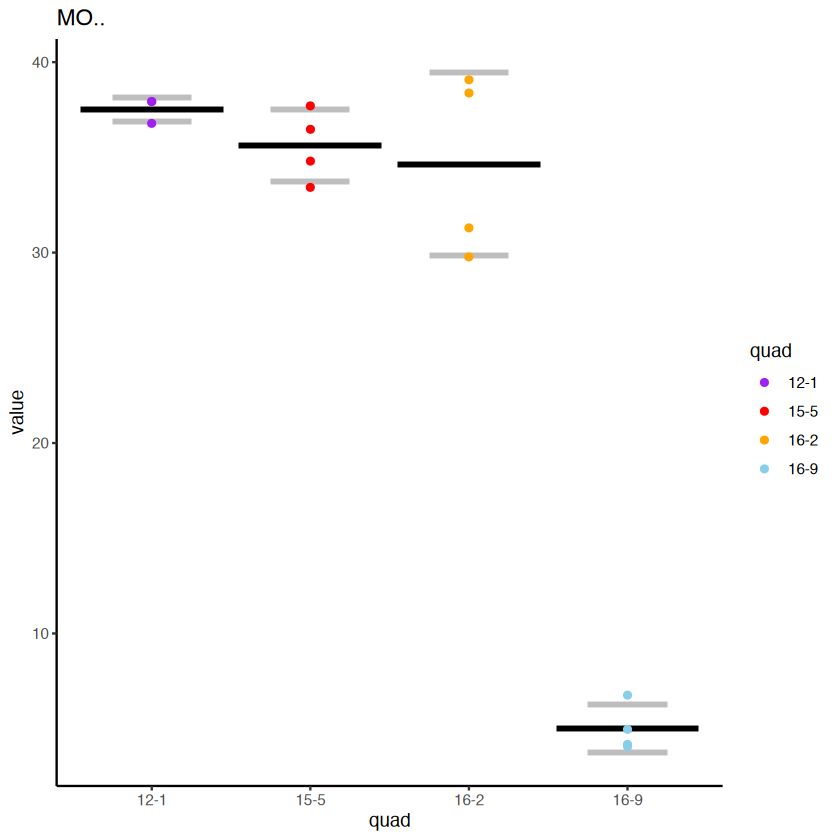

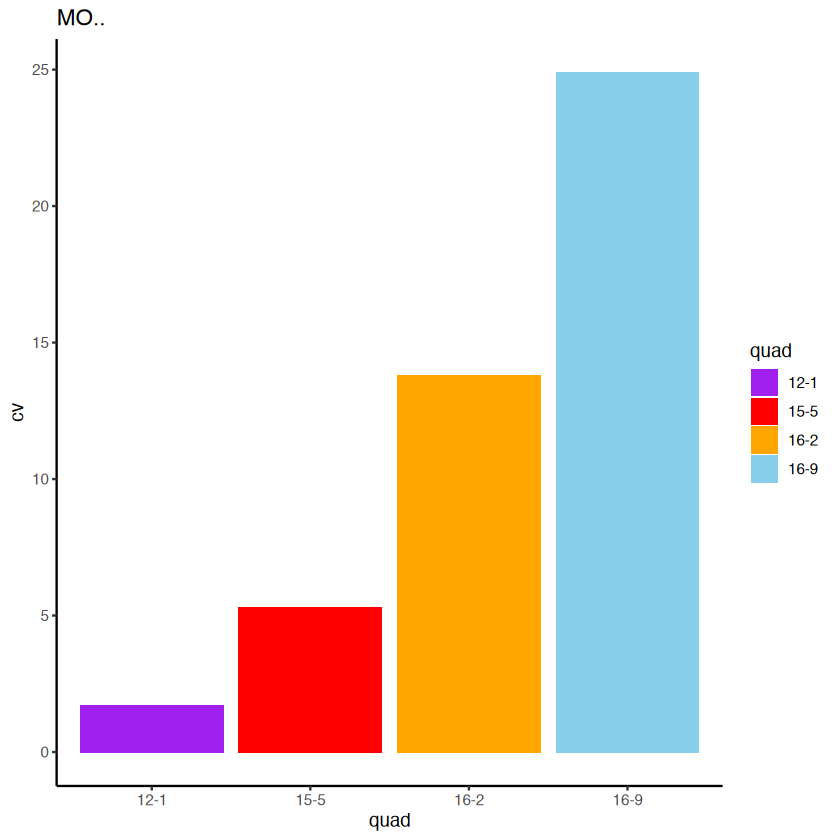

[1] "SD result"
[1] "12"                "LY."               "1.17222902161688" 
[4] "0.349359351309044"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


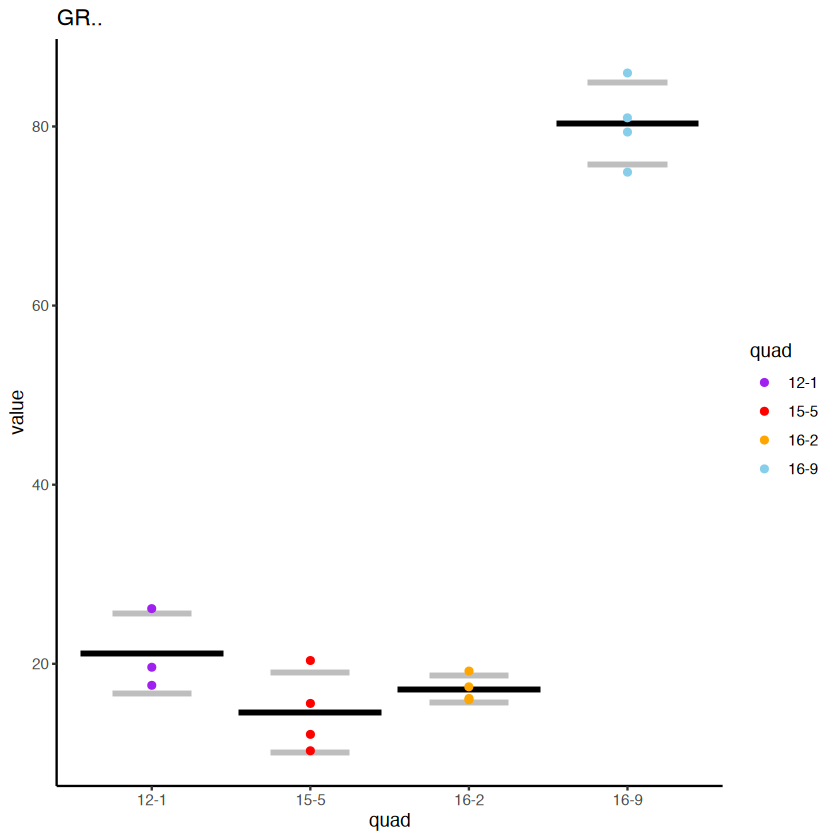

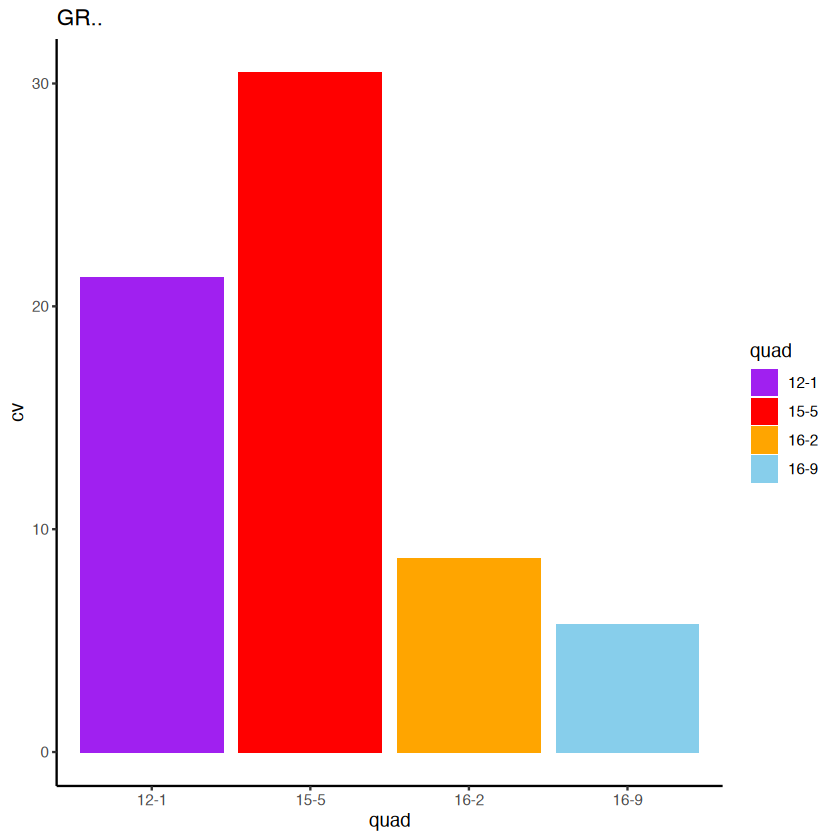

[1] "SD result"
[1] "13"               "MO."              "1.0440043366505"  "0.44778309994169"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


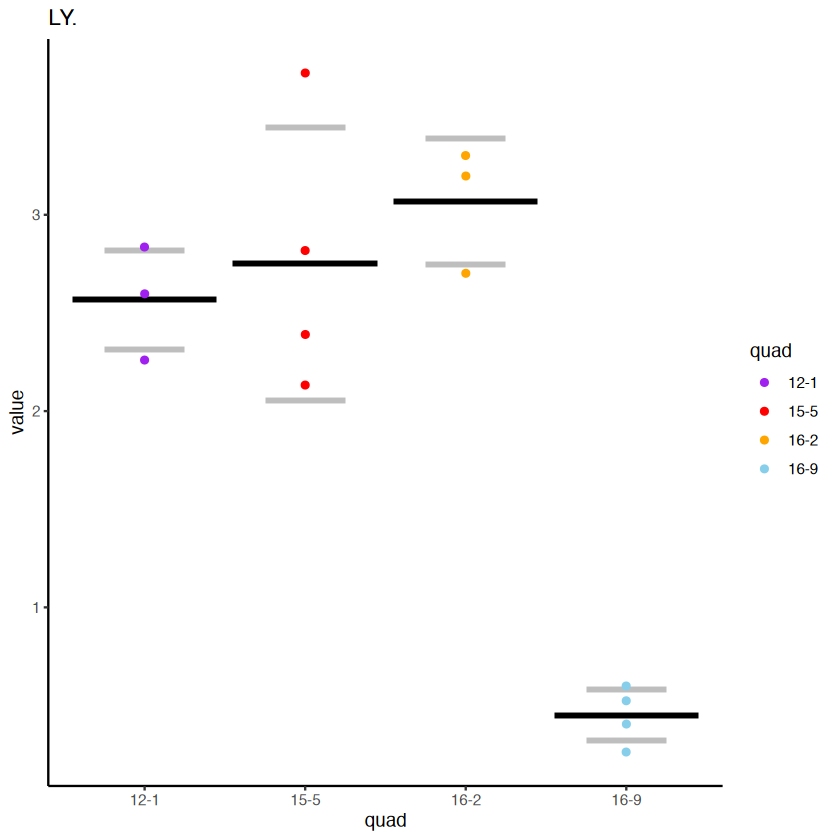

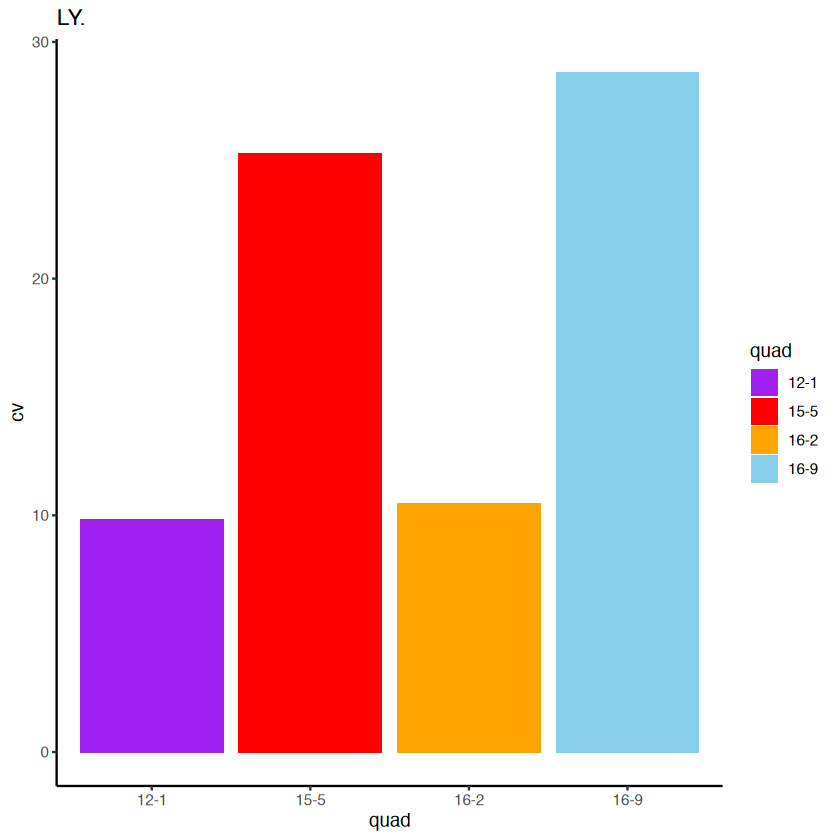

[1] "SD result"
[1] "14"                "GR."               "1.28586995394618" 
[4] "0.721803914096325"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


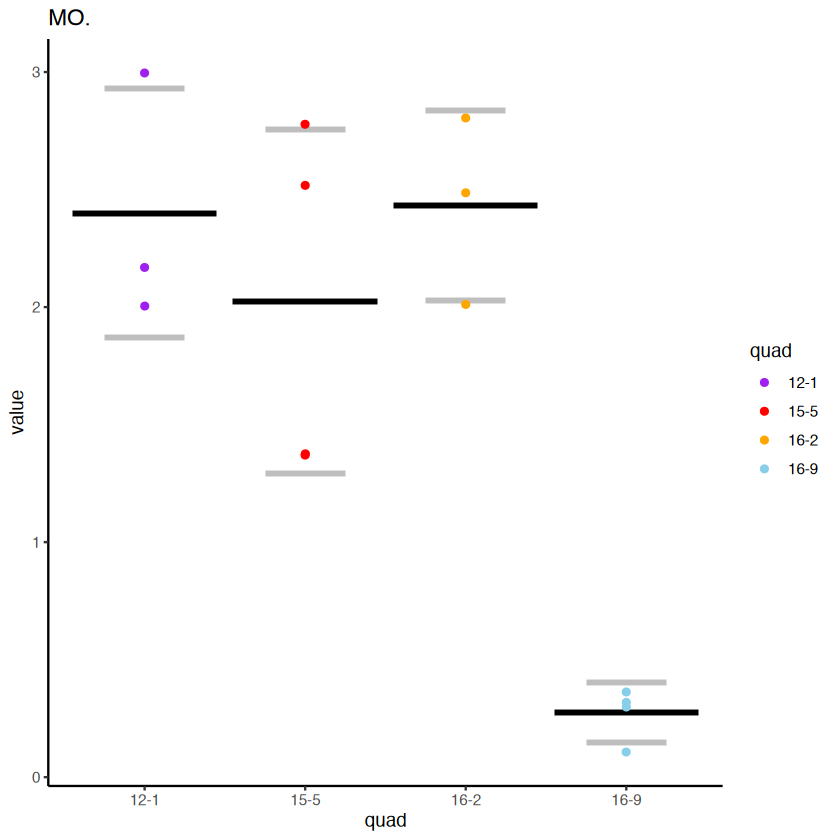

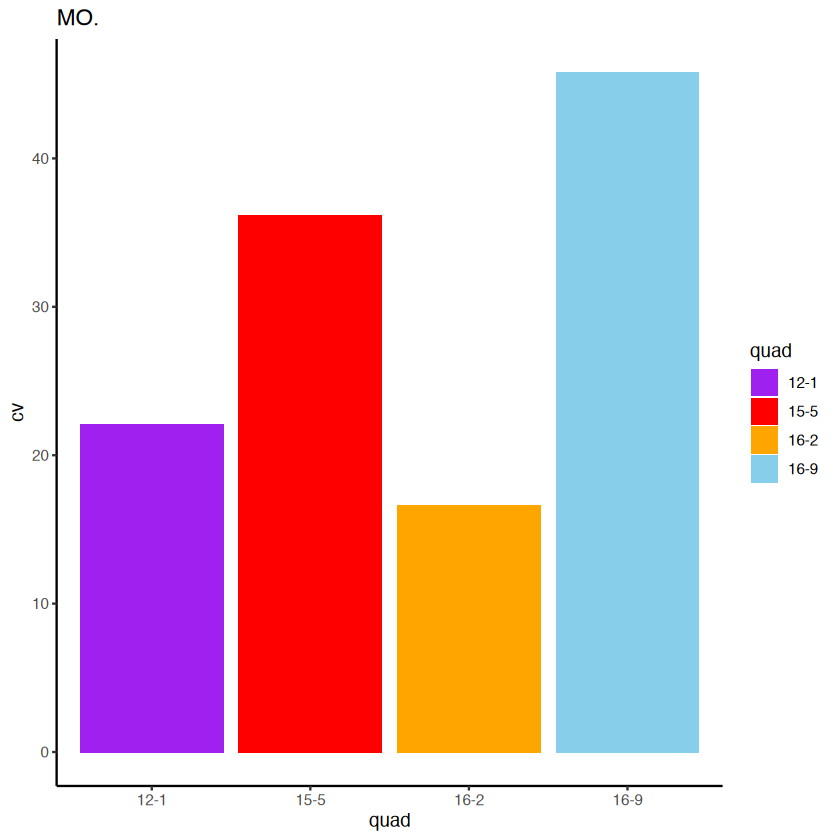

[1] "SD result"
[1] "15"                "RBC"               "0.611713099963264"
[4] "0.383591294321133"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


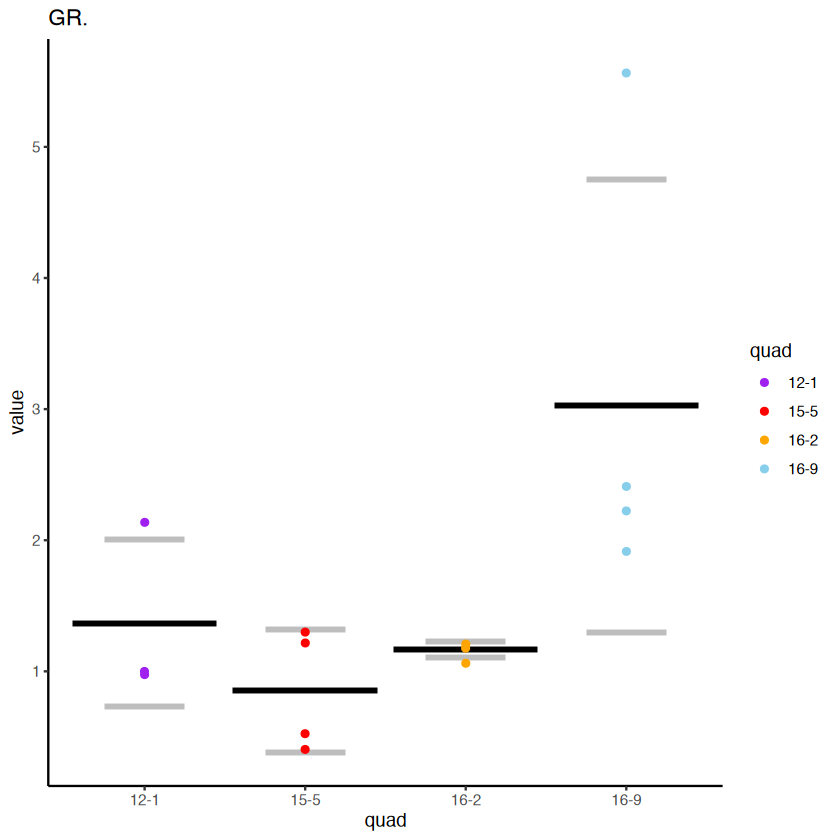

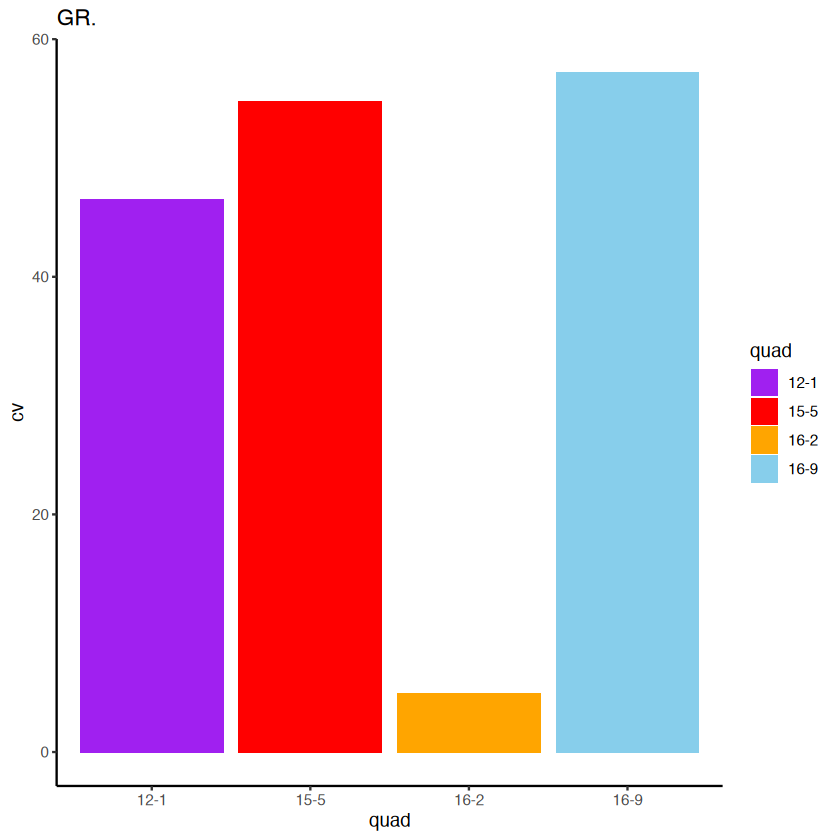

[1] "SD result"
[1] "16"                "Hgb"               "1.08066337651155" 
[4] "0.711195355342869"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


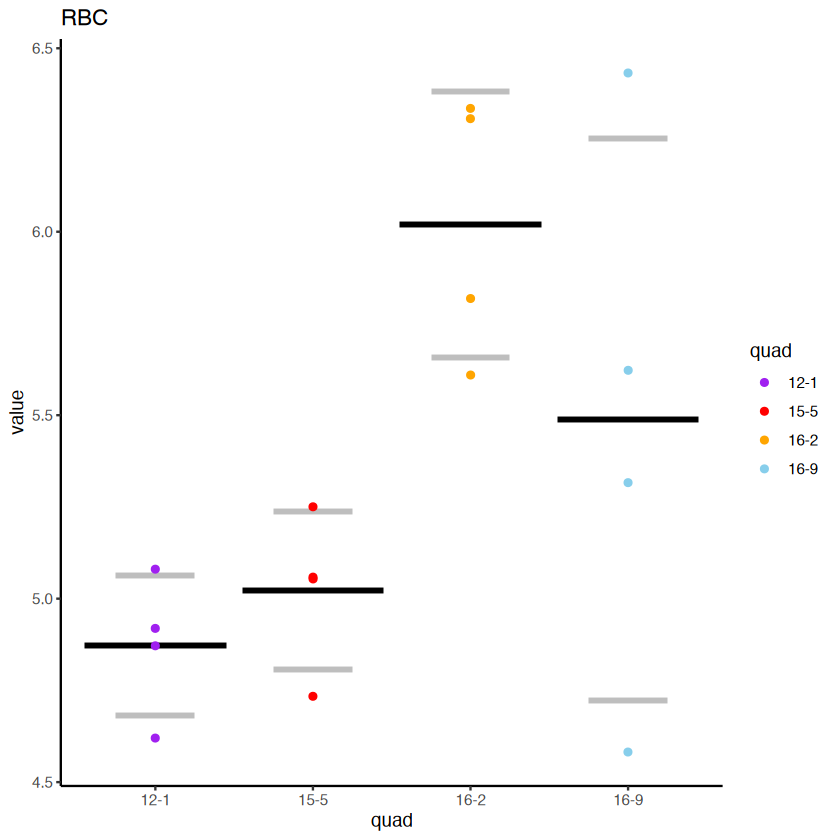

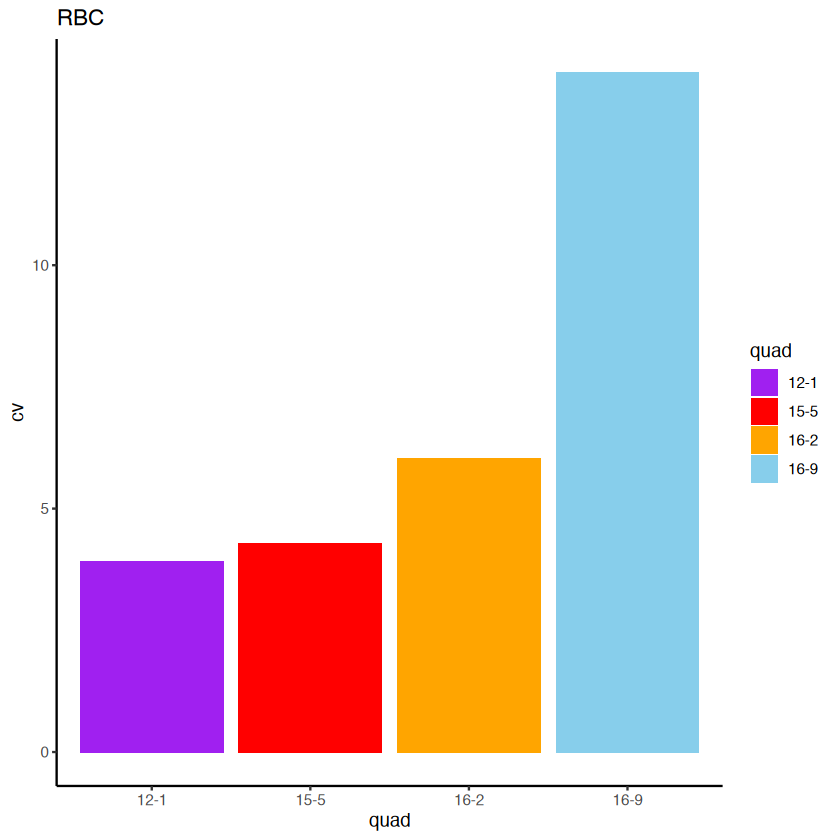

[1] "SD result"
[1] "17"               "Hct"              "3.50825717715401" "2.19105547039082"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


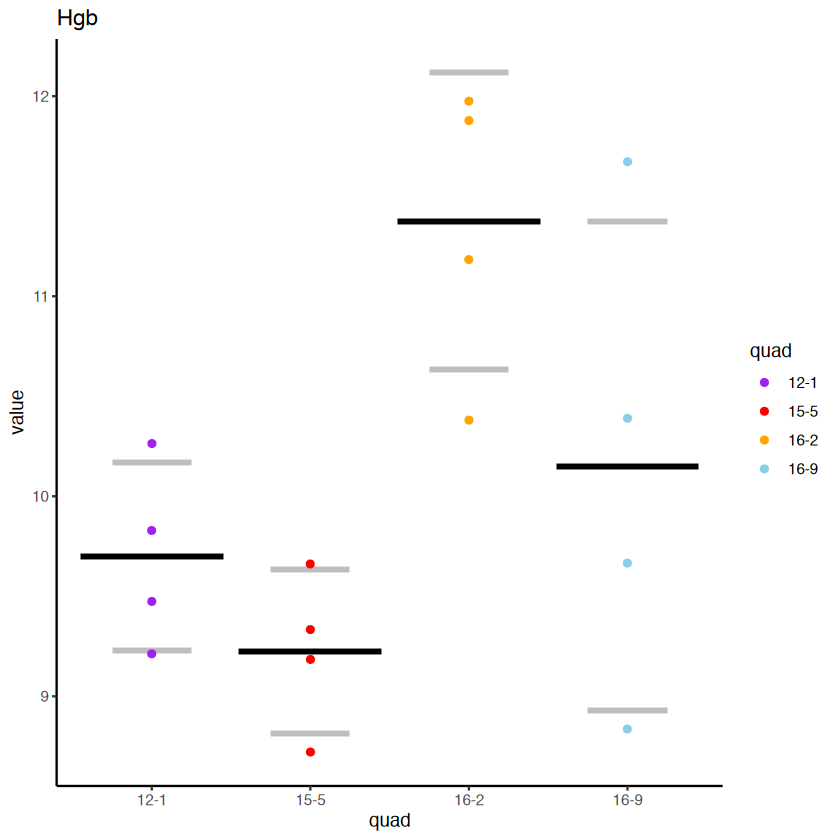

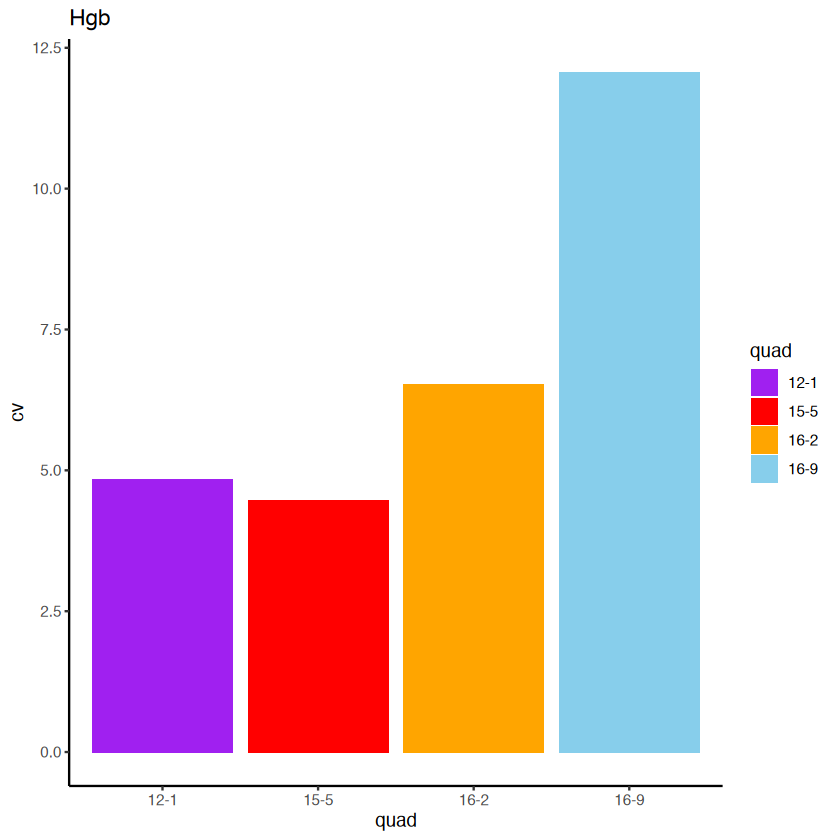

[1] "SD result"
[1] "18"                "MCV"               "4.8309936866032"  
[4] "0.837245258748188"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


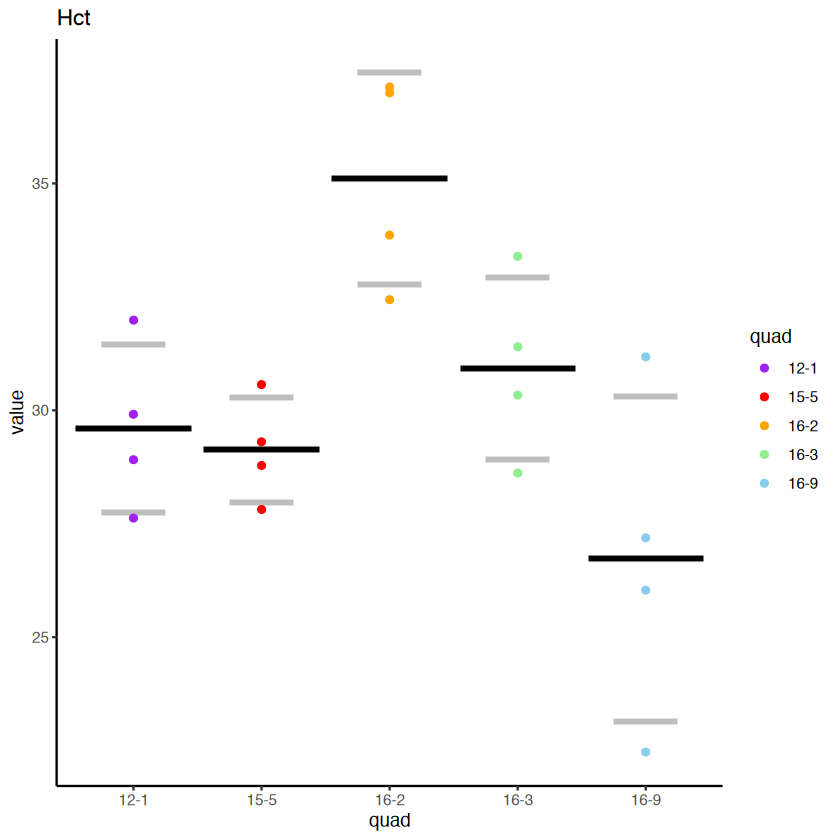

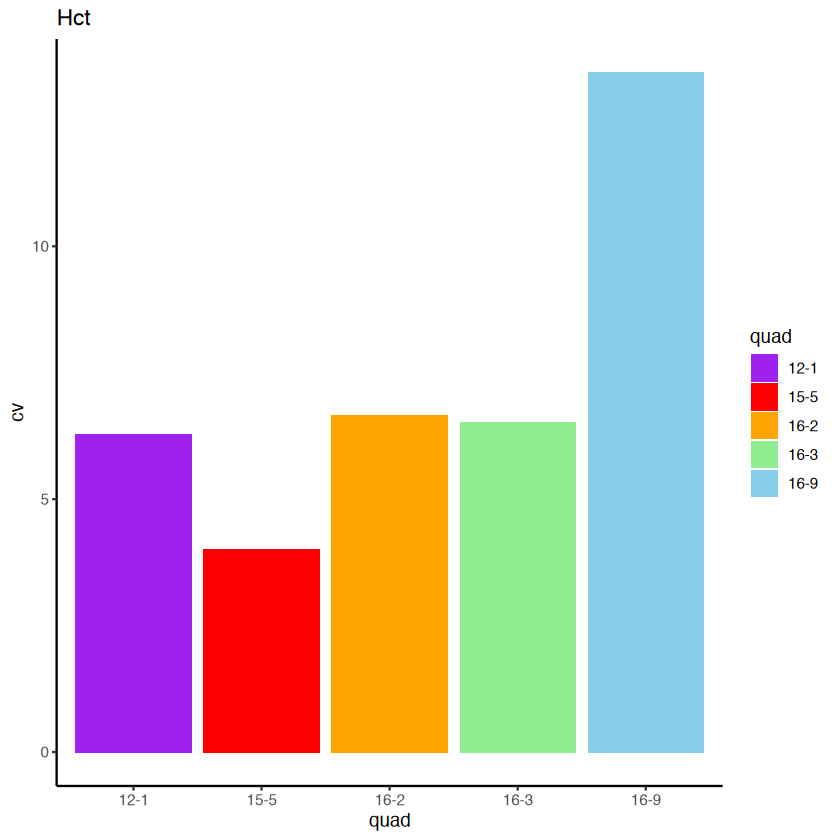

[1] "SD result"
[1] "19"                "MCH"               "0.75"             
[4] "0.471504359477572"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


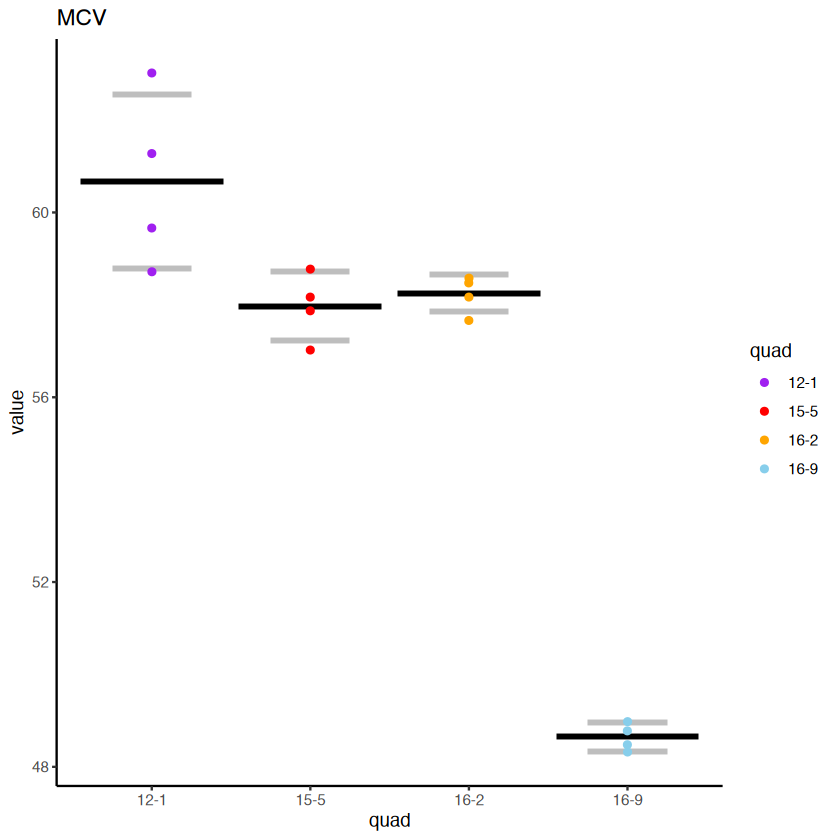

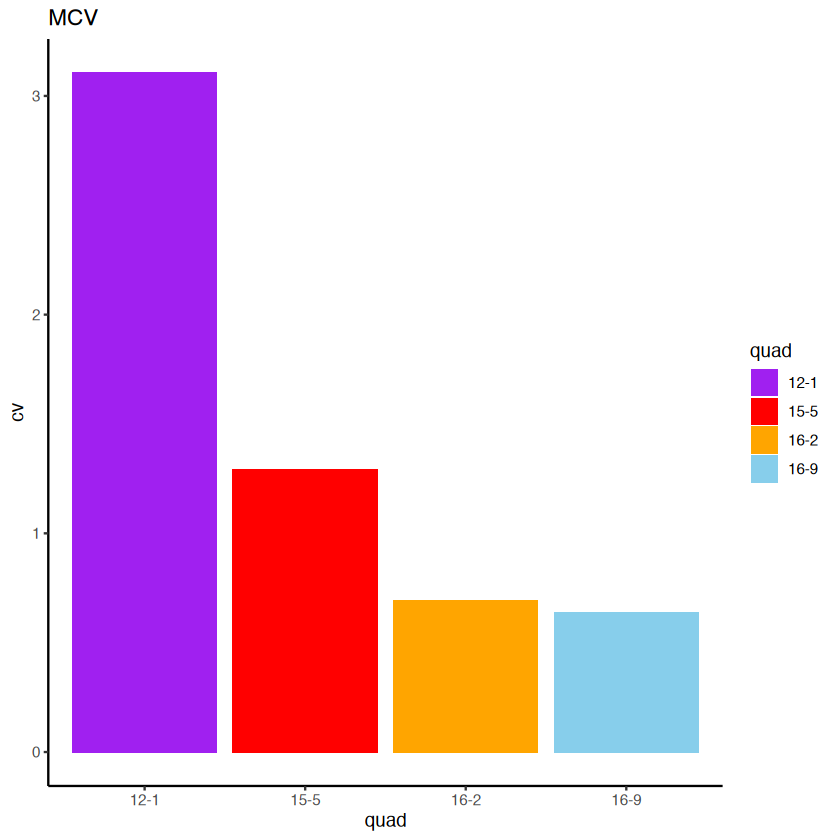

[1] "SD result"
[1] "20"                "MCHC"              "2.68846300575874" 
[4] "0.515872284727128"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


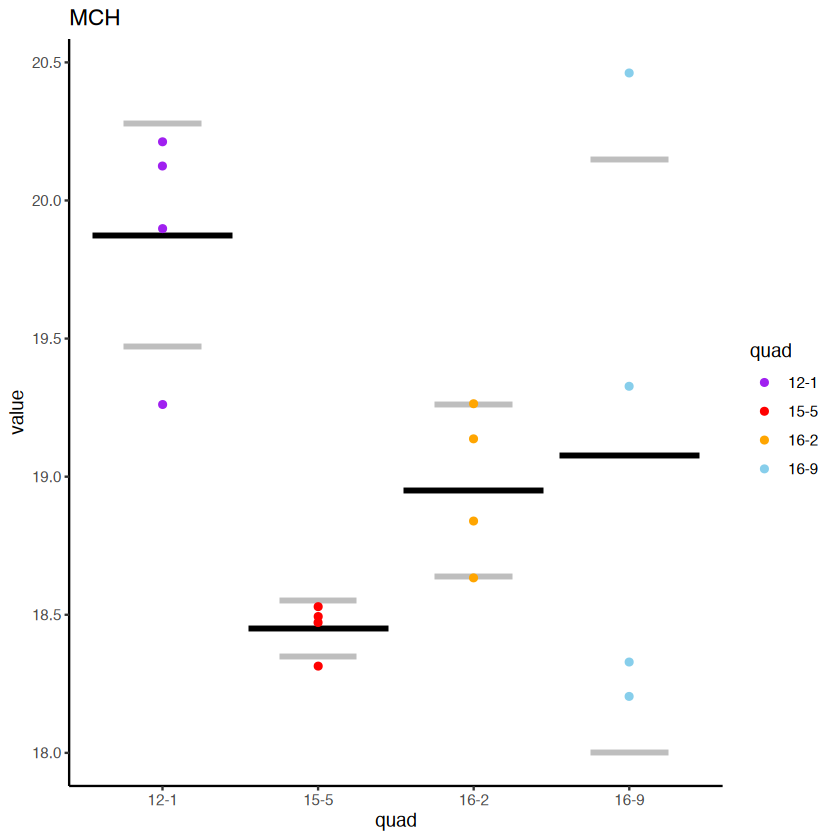

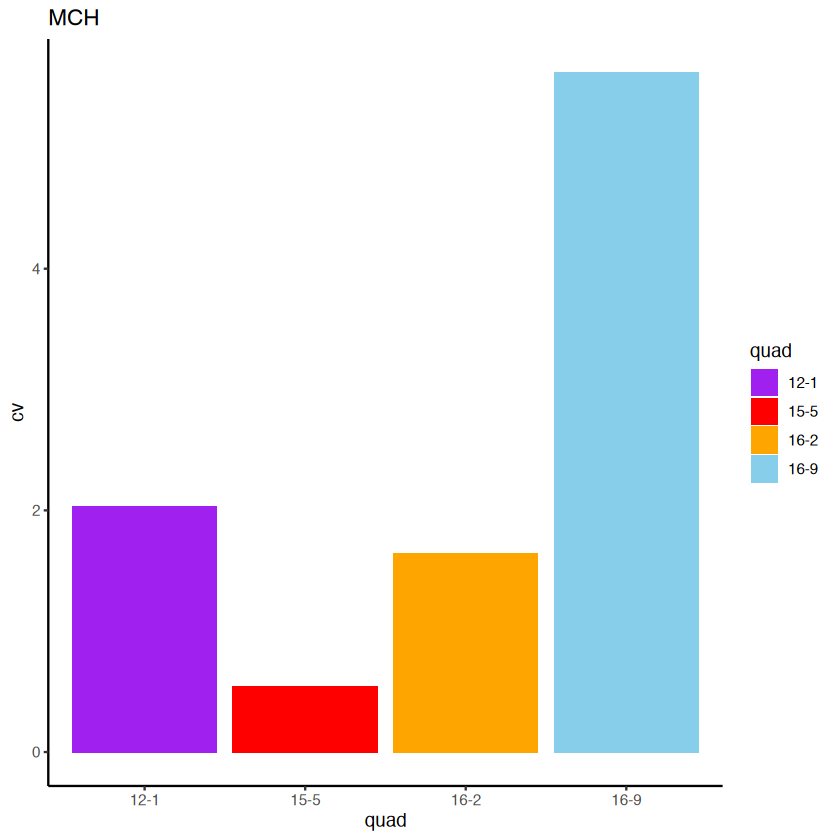

[1] "SD result"
[1] "21"                "RDW"               "2.09363121553598" 
[4] "0.453817970884042"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


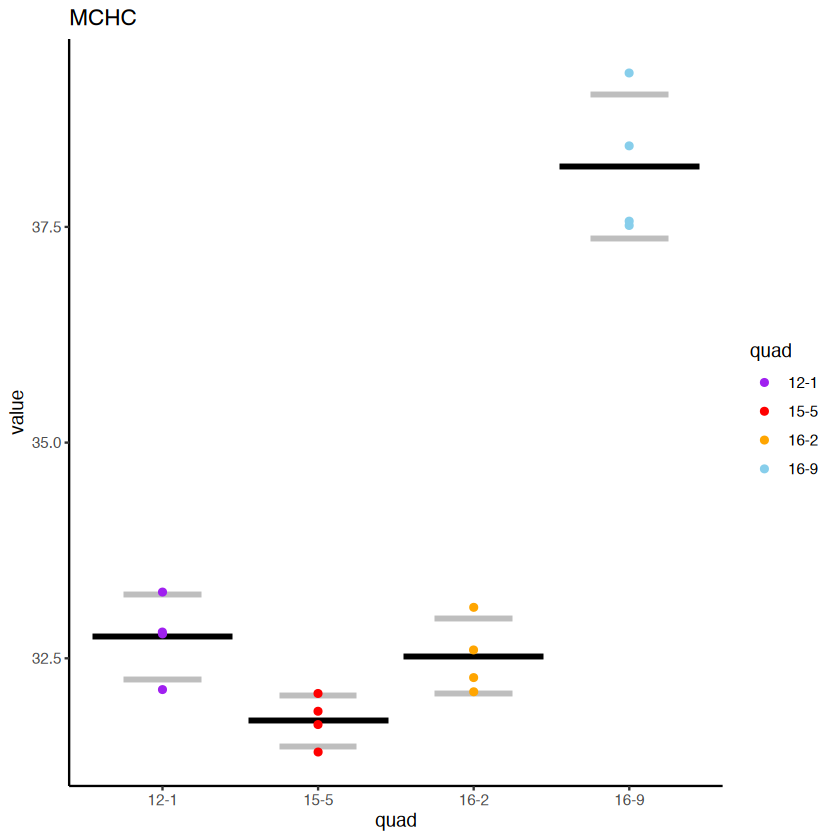

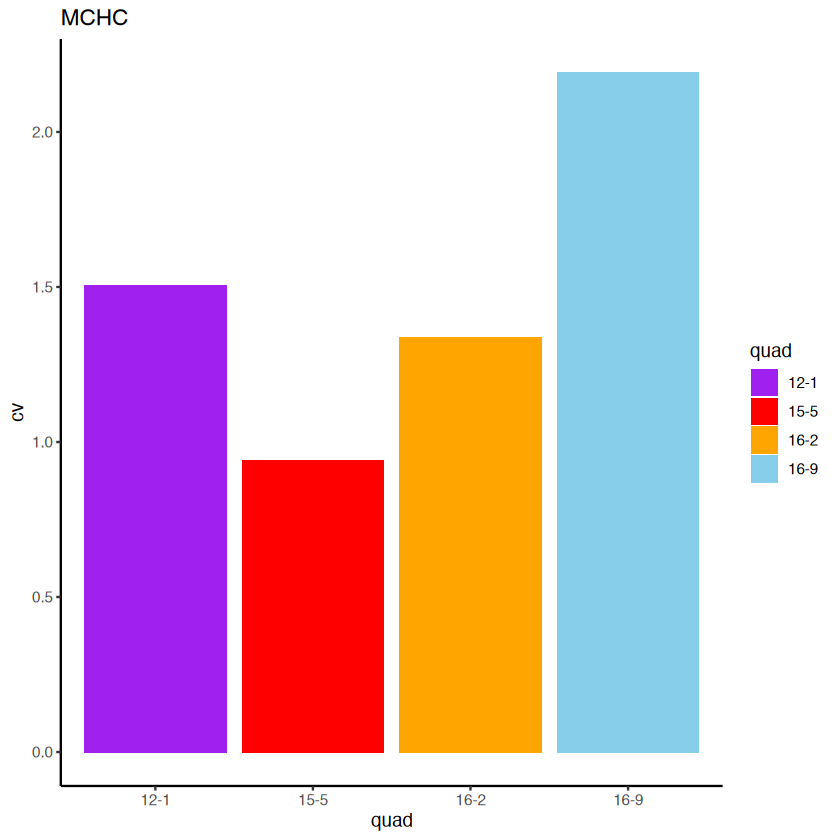

[1] "SD result"
[1] "22"               "Plt"              "137.428145727486" "42.9624199099677"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


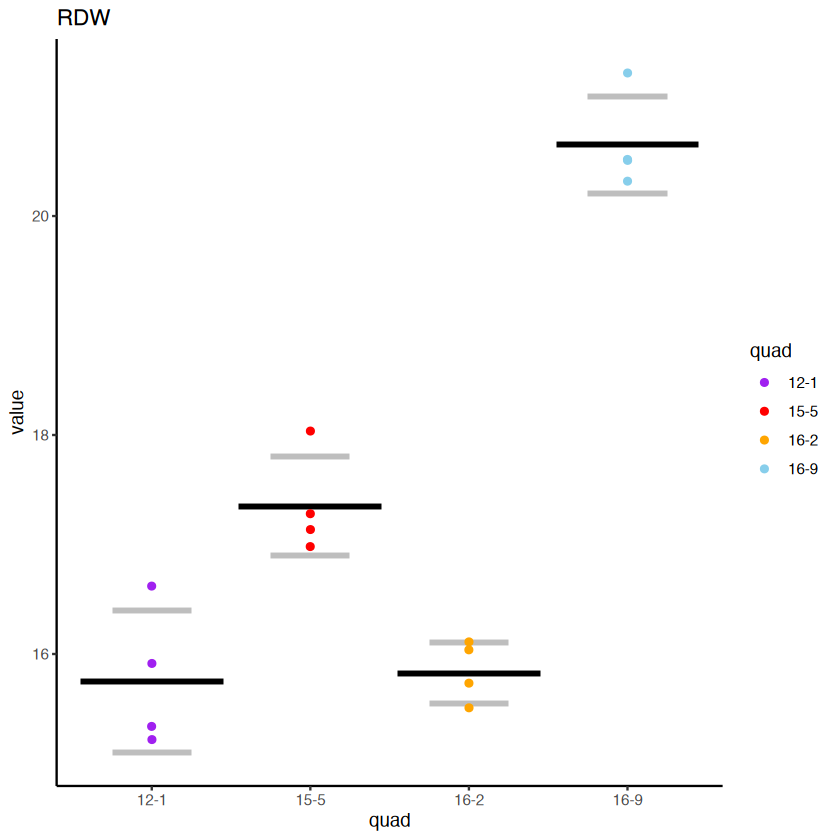

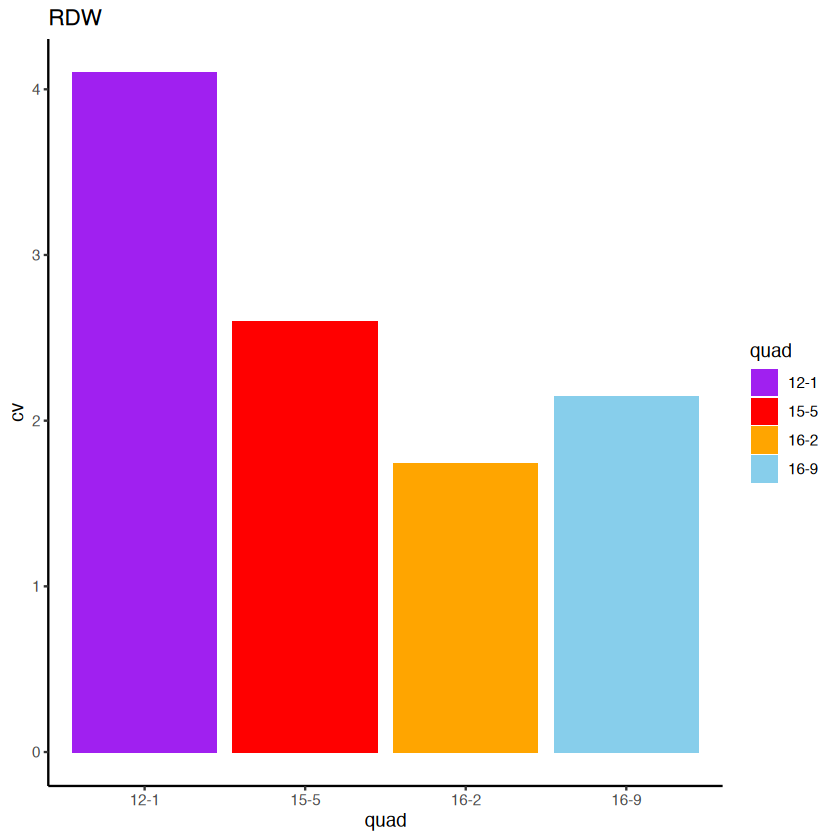

[1] "SD result"
[1] "23"                 "MPV"                "0.0577350269189624"
[4] "0.0577350269189624"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


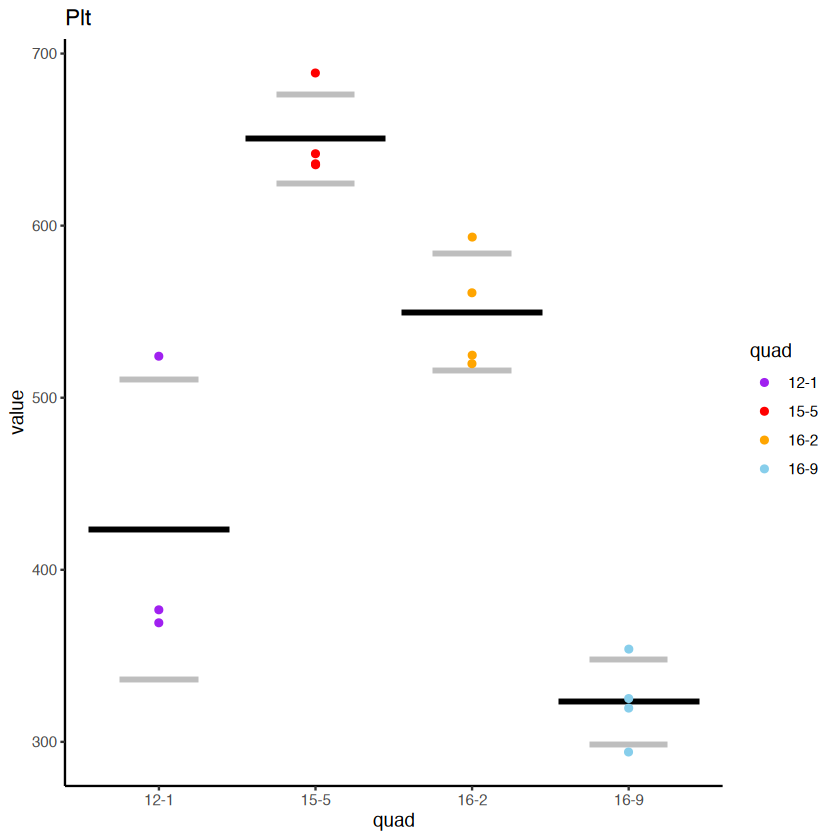

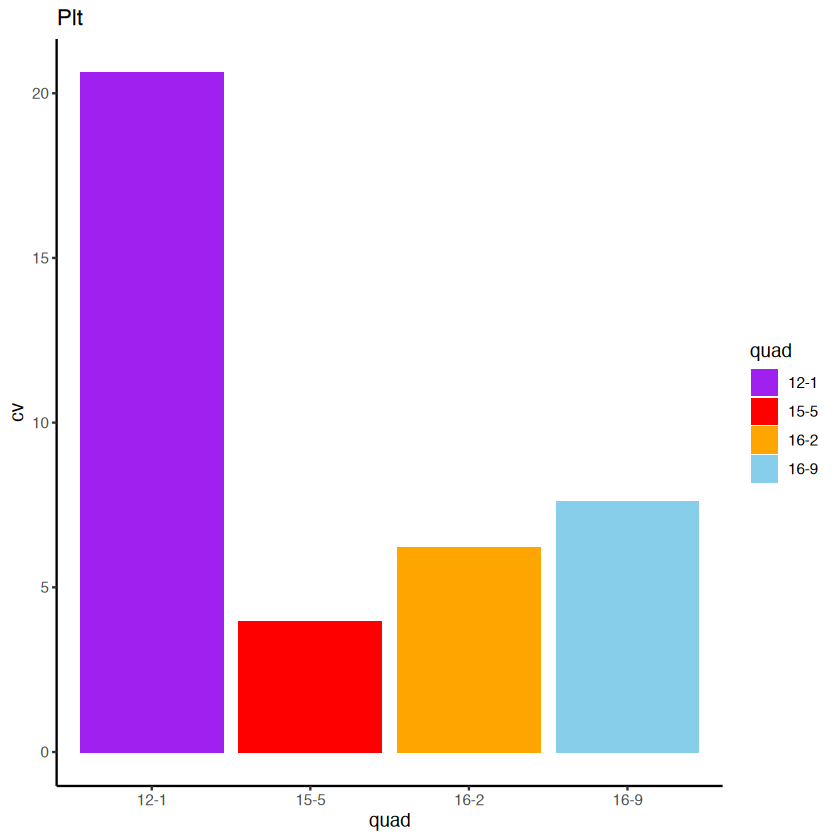

[1] "SD result"
[1] "24"    "...24" NA      "NaN"  
[1] "SD result"
[1] "25"               "GLU.H"            "12.7587504986074" "10.4819676777989"


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


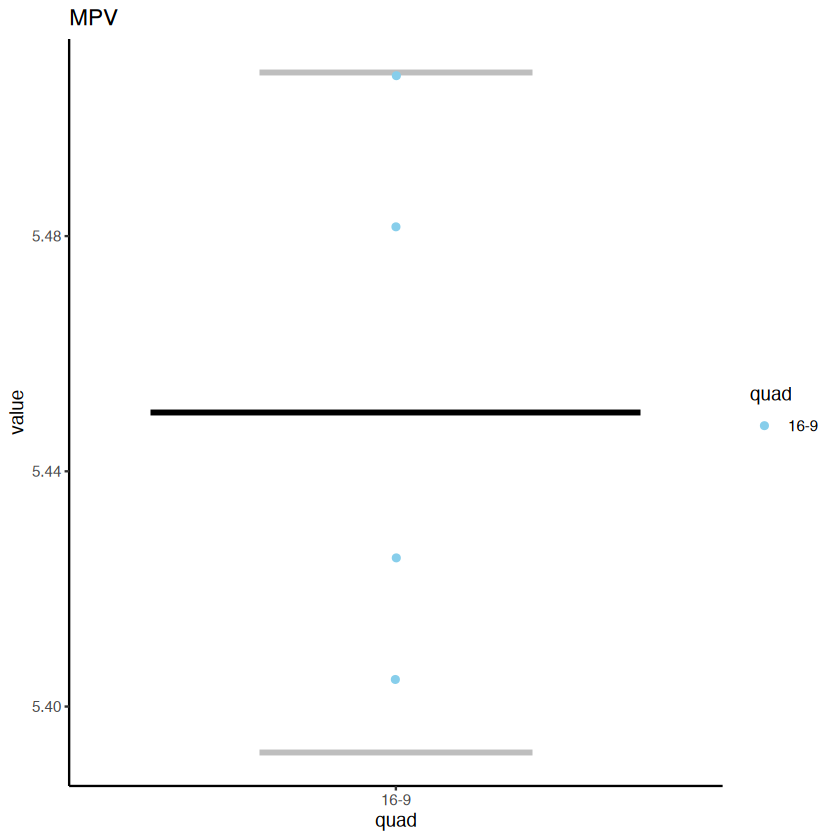

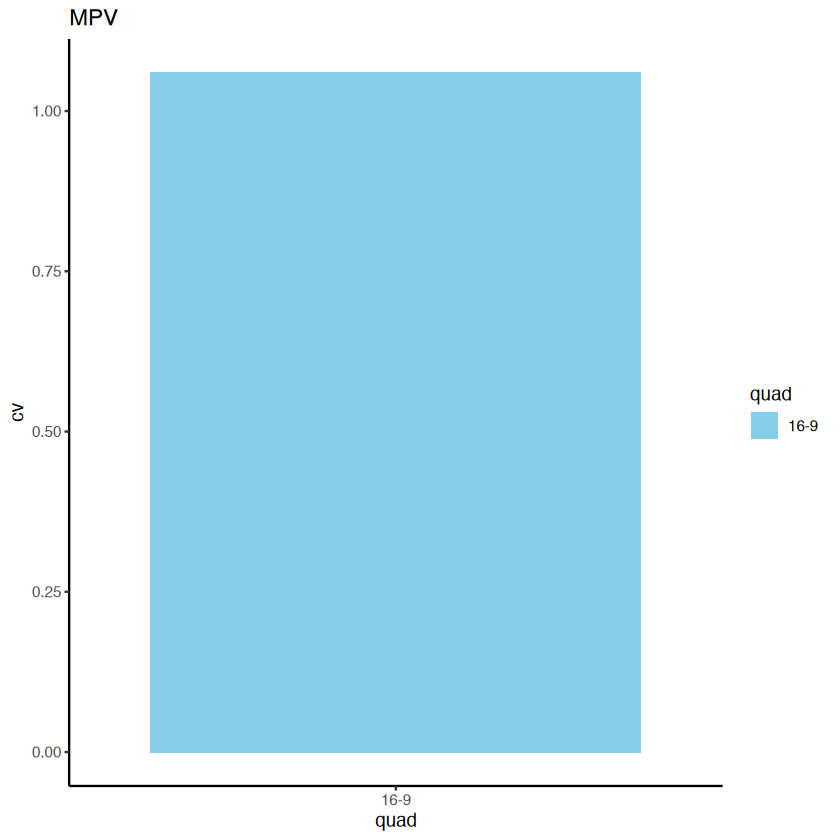

[1] "SD result"
[1] "26"   "time" "0"    "0"   


Warning message in stat_summary(fun.y = mean, geom = "crossbar", shape = "—", :
“Ignoring unknown parameters: `shape`”
Warning message in stat_summary(fun.y = function(d) {:
“Ignoring unknown parameters: `shape`”


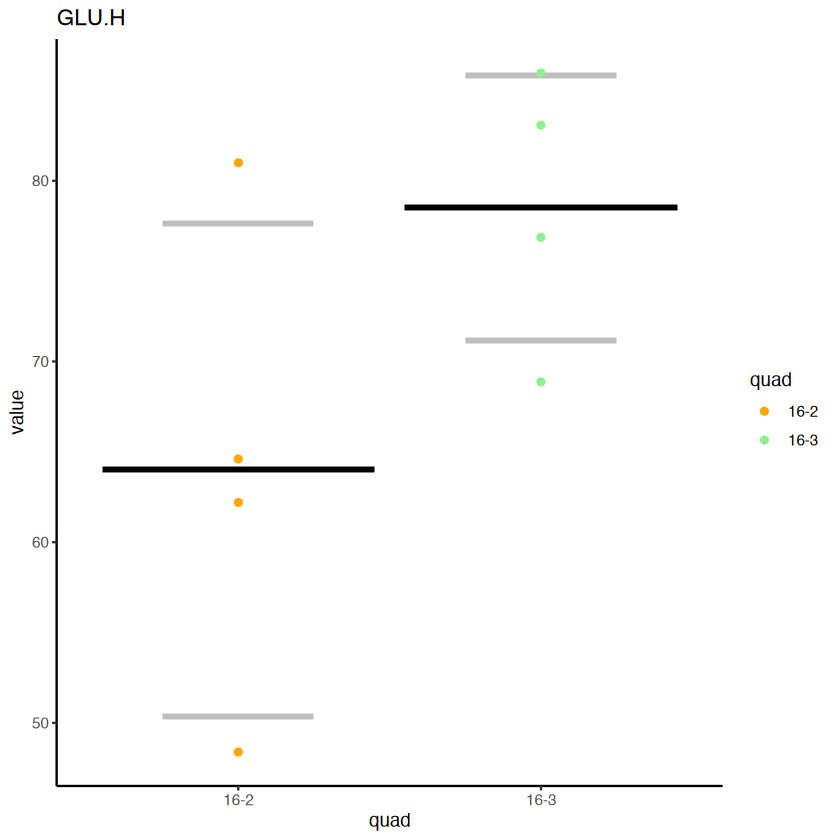

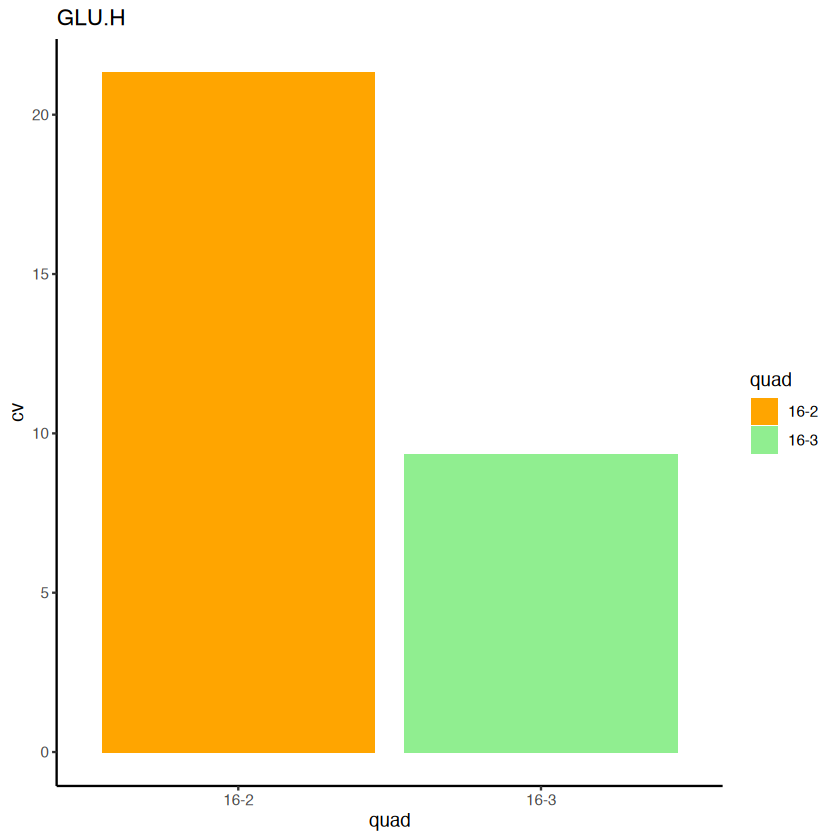

Warning message in compare.phenotype(weight):
“ 強制変換により NA が生成されました ”


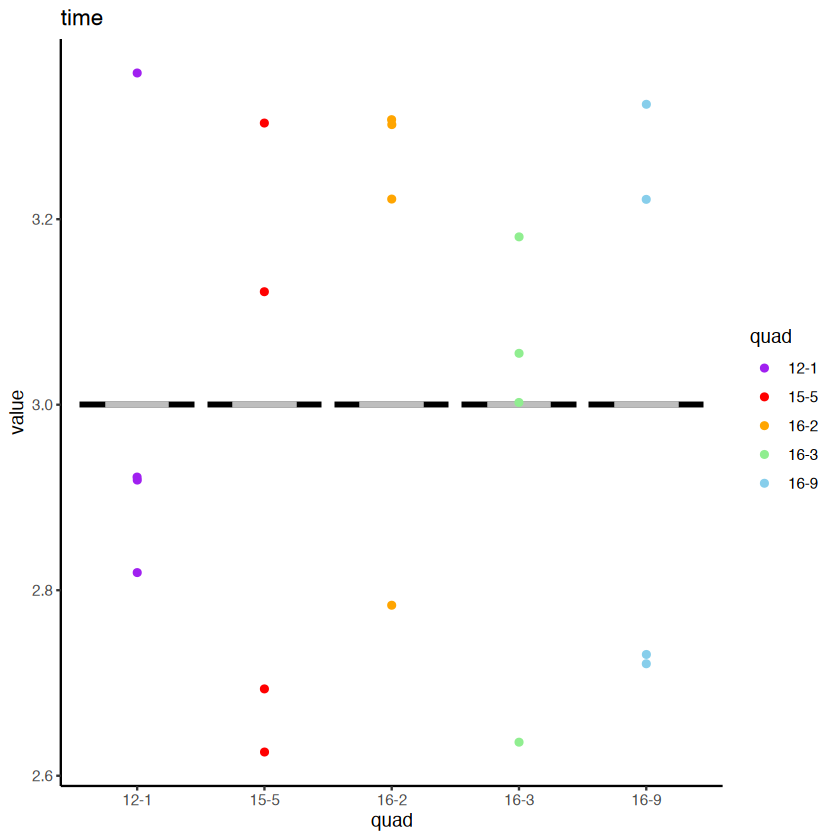

[1] "SD result"
[1] "29"   "quad" NA     "NaN" 


NULL

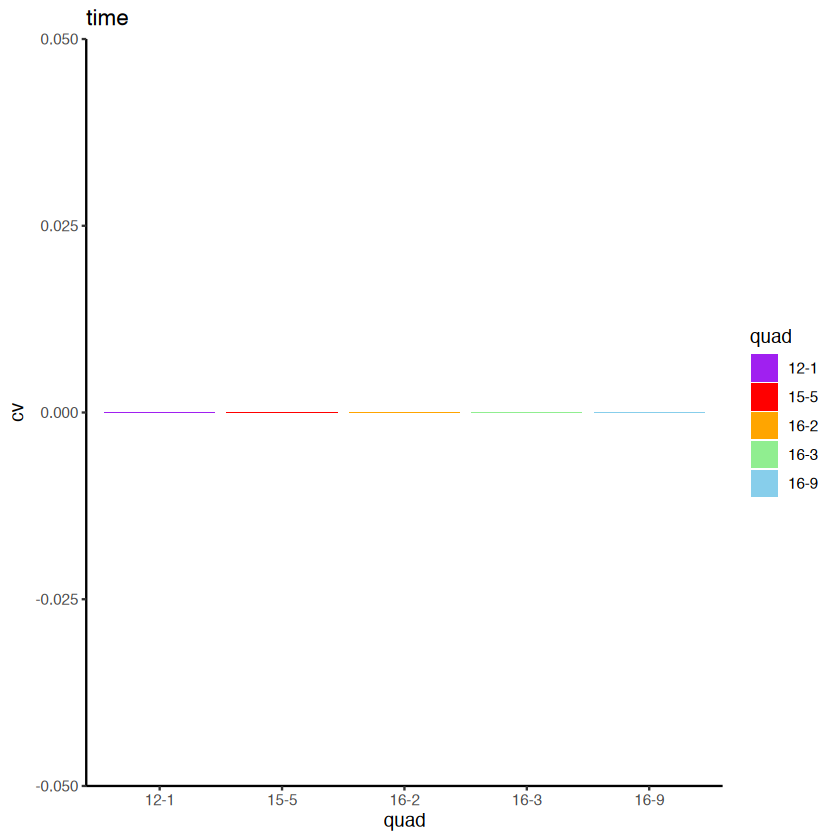

In [14]:
compare.phenotype <- function(wt_table) 
{
    col = c('purple', 'red', 'orange', 'lightgreen', 'skyblue')
    names(col) = factor(c('12-1', '15-5', '16-2', '16-3', '16-9'), levels=sort(unique(wt_table[,'quad'])))
    for (i in 4:dim(wt_table)[2]) {
        if (colnames(wt_table)[i] == 'rowname' || colnames(wt_table)[i] == 'ident') next
        temp = wt_table[,c('quad', colnames(wt_table)[i], 'rowname')]
        colnames(temp)[2] = 'value'
        temp = temp[!is.na(temp[,'value']),]
        temp[,'value'] = as.numeric(temp[,'value'])
        temp = temp[grep('_3$', temp[,'rowname']),]
        temp = temp[!duplicated(temp[,'rowname']),]
        quad_count = table(temp[,'quad'])
        quad_filtered = names(quad_count)[quad_count >= 3]
        temp = temp[temp[,'quad'] %in% quad_filtered,]
        result = temp %>% group_by(quad) %>% summarize(mean=mean(value), sd=sd(value))
        print('SD result')
        print(c(i, colnames(wt_table)[i], sd(temp[,'value'], na.rm=TRUE), mean(data.frame(result)[,'sd'], na.rm=TRUE)))
        if (all(is.na(result$mean))) next
        temp[,'quad'] = factor(temp[,'quad'], levels=sort(unique(wt_table[,'quad'])))
        temp = cbind(temp, ident=sapply(temp[,'rowname'], function(x) {
            return(unlist(strsplit(as.character(x), '_'))[2])
        }))
        pdf(paste0('../data/metadata/figure/bar_raw_blood_phenotype_', i,  '_', colnames(wt_table)[i], '.pdf'), useDingbats=FALSE)
        g <- ggplot(temp, aes(x=quad, y=value, color=quad))+
        stat_summary(fun.y=mean, geom="crossbar", shape="\U2014", color="black")+
        stat_summary(fun.y=function(d) {mean(d) + sd(d)*c(-1,1)}, geom="crossbar", width=0.5, shape="\U2014", colour="gray")+
        geom_jitter(width=0.001)+
        scale_color_manual(values=col)+theme_classic()+ggtitle(colnames(wt_table)[i])
        plot(g)
        dev.off()
        plot(g)
        cv <- data.frame(result, c(result[,'sd'] / result[,'mean'] * 100))
        colnames(cv)[dim(cv)[2]] = 'cv'
        cv[,'quad'] = factor(cv[,'quad'], levels=sort(unique(wt_table[,'quad'])))
        write.table(file=paste0('cv_', i, '_', colnames(wt_table)[i], '.csv'), cv, sep=",")
        g <- ggplot(cv, aes(x=quad, y=cv, fill=quad))+geom_bar(stat="identity")+scale_fill_manual(values=col)+theme_classic()+ggtitle(colnames(wt_table)[i])
        pdf(paste0('../data/metadata/figure/dist_cv_blood_phenotype_', i, '_', colnames(wt_table)[i], '.pdf'), useDingbats=FALSE)
        plot(g)
        dev.off()
        plot(g)

    }
    return()
}

compare.phenotype(weight)

In [15]:
head(weight)

,ID,Date,Time,Weight,AST,LDH,ALT,WBC,LY..,MO..,⋯,MCHC,RDW,Plt,MPV,...24,GLU.H,time,rowname,ident,quad
,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,16-201,2018-06-15,11:23:00,6.7,22.2,755,NA,6.3,43.5,39.1,⋯,32.299999999999997,16.100000000000001,520,NA,NA,NA,3,16-2_1_3,1,16-2
2,16-201,2018-07-20,02:45:00,6.75,36.0,915,5.7,4.0999999999999996,NA,NA,⋯,NA,NA,NA,NA,NA,82,3,16-2_1_3,1,16-2
3,16-202,2018-06-15,11:34:00,6.95,21.4,716,NA,NA,54.1,29.8,⋯,32.6,15.7,561,NA,NA,NA,3,16-2_2_3,2,16-2
4,16-202,2018-07-20,02:47:00,6.95,44.1,1007,9.3000000000000007,5.6,NA,NA,⋯,NA,NA,NA,NA,NA,61,3,16-2_2_3,2,16-2
5,16-203,2018-06-15,11:35:00,6.85,20.2,741,NA,7.2,45.6,38.4,⋯,32.1,16,593,NA,NA,NA,3,16-2_3_3,3,16-2
6,16-203,2018-07-20,02:49:00,6.75,20.2,797,NA,6.2,NA,NA,⋯,NA,NA,NA,NA,NA,64,3,16-2_3_3,3,16-2
